1. Charger le fichier avec read
_
csv(). Vous devrez utiliser l’option skip_
rows (voir la
documentation de pandas) puis appliquer la fonction .head()

In [ ]:
import pandas as pd

path_to_file = '/content/sample_data/dataset_exoplanets.csv'

# Lire le fichier CSV, dans VScode on voit 96 lignes avec #
df = pd.read_csv(path_to_file, sep=',',skiprows=96)  # ou sep=',' si le fichier utilise des virgules

# Afficher les premières lignes
df.head()



,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14


2. Extraire la liste du nom des colonnes du dataset.

In [ ]:
liste_colonnes = df.columns.tolist()
print(liste_colonnes)


['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'discoverymethod', 'disc_year', 'disc_facility', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_refname', 'st_spectype', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_metratio', 'st_logg', 'st

3. Quelle est la taille du dataset ?

In [ ]:
#Sélectionnet le colonnes pas besoin des 92 ex juste masse avec Jupeter erath on garde
#nom, masse, distance, flux, periode, tmp de planete : une li faut une dizaine colonnes

#il y a une ligne par decouverte, par équipe de chercheur donc il faut enlevé les doublons, une ligne par nom
#mais la fonction drop-duplicate a plusieurs paramettre cf docs par défault enlevé les lignes identiques

# Garder uniquement les colonnes souhaitées
colonnes_a_garder = [
    'pl_name', 'hostname', 'disc_year', 'discoverymethod',
    'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj',
    'pl_bmasse', 'pl_bmassj', 'pl_orbeccen',
    'pl_insol', 'pl_eqt', 'st_teff', 'st_logg'
]

df = df[colonnes_a_garder]

# Afficher les premières lignes
df.head()
print(f"Nombre de lignes : {df.shape[0]}")


Nombre de lignes : 38449


In [ ]:
# Supprimer les doublons de pl_name en gardant la ligne la plus complète
df = df.loc[df.groupby('pl_name').apply(lambda x: x.notna().sum(axis=1).idxmax())]

# Réinitialiser les index après le filtrage
df = df.reset_index(drop=True)

# Afficher le nombre de lignes après suppression des doublons
print(f"Nombre de lignes uniques par planète : {df.shape[0]}")


Nombre de lignes uniques par planète : 5903


<ipython-input-4-a181d3cd2068>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.loc[df.groupby('pl_name').apply(lambda x: x.notna().sum(axis=1).idxmax())]


4. Renommer les colonnes pour qu’elles aient des noms plus explicites, si besoin.

In [ ]:
# Correspondance pour renommage (colonne originale : nom explicite)
renommage = {
    'pl_name': 'Planet Name',
    'hostname': 'Host Name',
    'disc_year': 'Discovery Year',
    'discoverymethod': 'Discovery Method',
    'pl_orbper': 'Orbital Period [days]',
    'pl_orbsmax': 'Orbit Semi-Major Axis [au]',
    'pl_rade': 'Planet Radius [Earth Radius]',
    'pl_radj': 'Planet Radius [Jupiter Radius]',
    'pl_bmasse': 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'pl_bmassj': 'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'pl_orbeccen': 'Eccentricity',
    'pl_insol': 'Insolation Flux [Earth Flux]',
    'pl_eqt': 'Equilibrium Temperature [K]',
    'st_teff': 'Stellar Effective Temperature [K]',
    'st_logg': 'Stellar Surface Gravity [log10(cm/s**2)]'
}


# Renommer les colonnes
df = df.rename(columns=renommage)

# Affichage des premières lignes pour vérification
print(df.head())

  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

5. Afficher le taux de remplissage de chaque colonne.

In [ ]:
# Calculer le taux de remplissage (%) par colonne
taux_remplissage = df.notna().mean() * 100

# Afficher le résultat avec un arrondi à 2 décimales
print(taux_remplissage.round(2))


Planet Name                                  100.00
Host Name                                    100.00
Discovery Year                               100.00
Discovery Method                             100.00
Orbital Period [days]                         94.97
Orbit Semi-Major Axis [au]                    93.83
Planet Radius [Earth Radius]                  75.33
Planet Radius [Jupiter Radius]                75.33
Planet Mass or Mass*sin(i) [Earth Mass]       45.81
Planet Mass or Mass*sin(i) [Jupiter Mass]     45.81
Eccentricity                                  83.82
Insolation Flux [Earth Flux]                  58.44
Equilibrium Temperature [K]                   72.10
Stellar Effective Temperature [K]             92.31
Stellar Surface Gravity [log10(cm/s**2)]      88.31
dtype: float64


6. Repérer où sont les valeurs nulles et proposer une explication. Est-ce que ces valeurs
n’existent pas ou est-ce qu’elle n’ont pas été remplies ?

In [ ]:
# Nombre de valeurs nulles par colonne
null_counts = df.isna().sum()
print("Nombre de valeurs nulles par colonne :")
print(null_counts)

# Afficher les lignes où il y a au moins une valeur nulle
lignes_avec_null = df[df.isna().any(axis=1)]
print(f"\nNombre de lignes avec au moins une valeur nulle : {len(lignes_avec_null)}")

# Afficher un échantillon de ces lignes
print(lignes_avec_null.head())


Nombre de valeurs nulles par colonne :
Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64

Nombre de lignes avec au moins une valeur nulle : 5547
  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UM

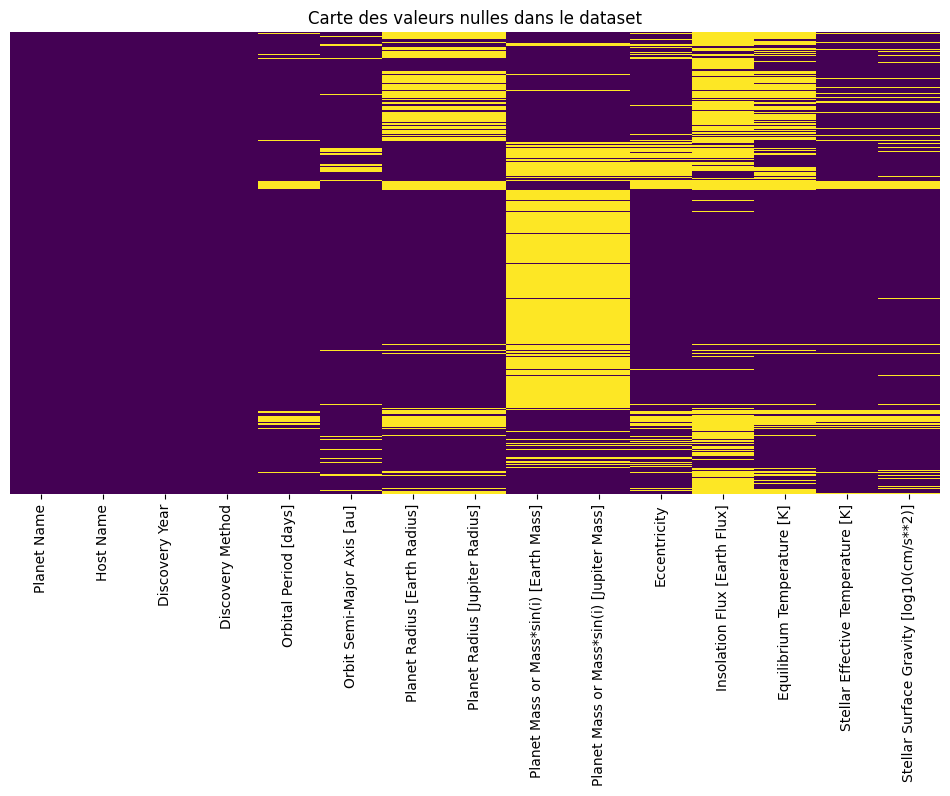

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Carte des valeurs nulles dans le dataset")
plt.show()


7. Y a-t-il des doublons ? Vous explorerez la fonction duplicated() pour répondre à cette
question.

In [ ]:
# Vérifier s'il y a des lignes dupliquées
doublons = df.duplicated()

# Nombre total de doublons
nb_doublons = doublons.sum()

print(f"Nombre de lignes doublons dans le dataset : {nb_doublons}")

# Afficher quelques exemples de doublons si besoin
if nb_doublons > 0:
    print("Exemples de doublons :")
    print(df[doublons].head())
else:
    print("Aucun doublon détecté.")


Nombre de lignes doublons dans le dataset : 0
Aucun doublon détecté.


8. Tracer la distribution de chaque indicateur (fonction histplot() de seaborn)

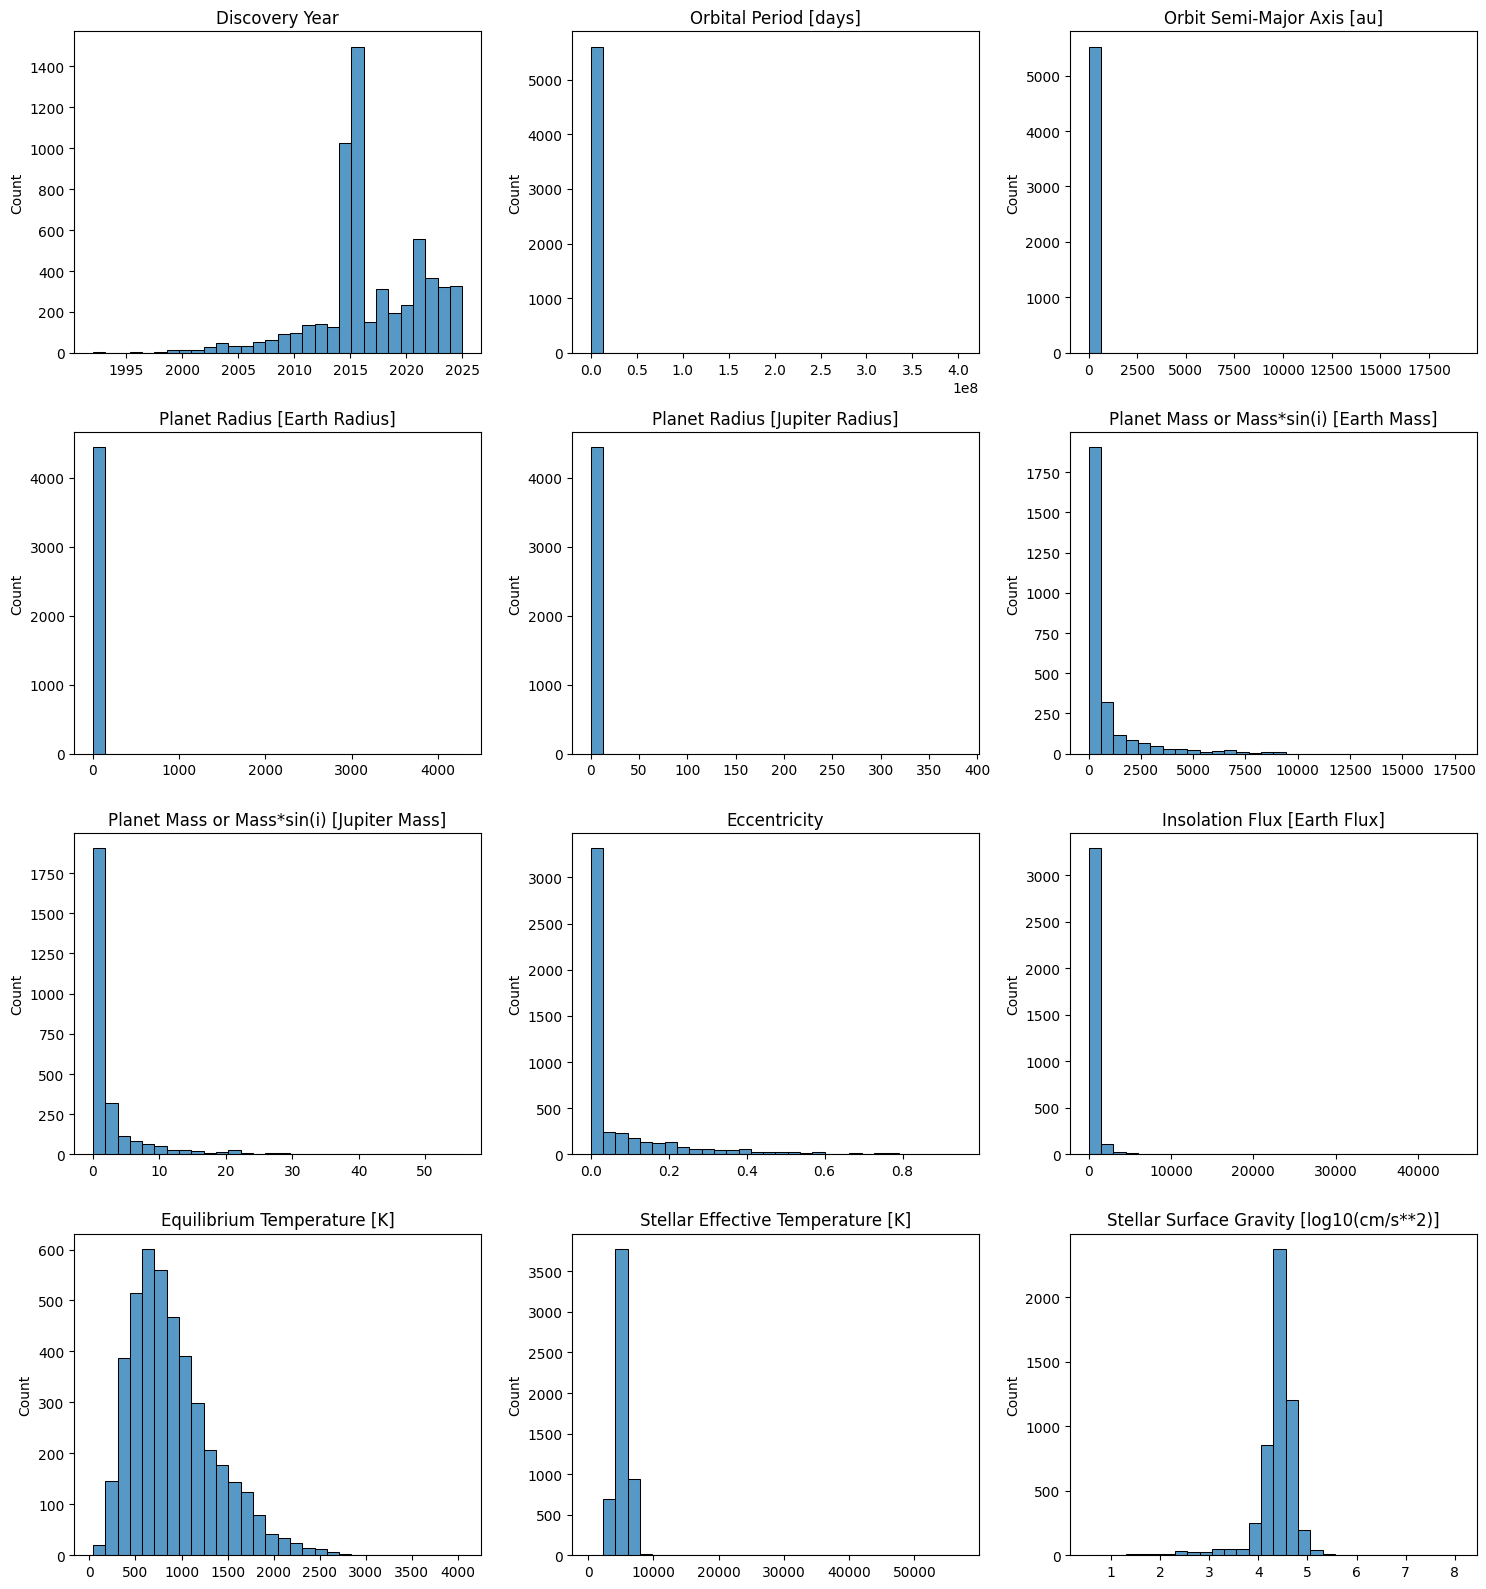

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques pour les histogrammes
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# Définir le nombre de colonnes pour l'affichage en grille
n_cols = 3
n_rows = (len(colonnes_numeriques) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col].dropna(), kde=False, bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


9. Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)

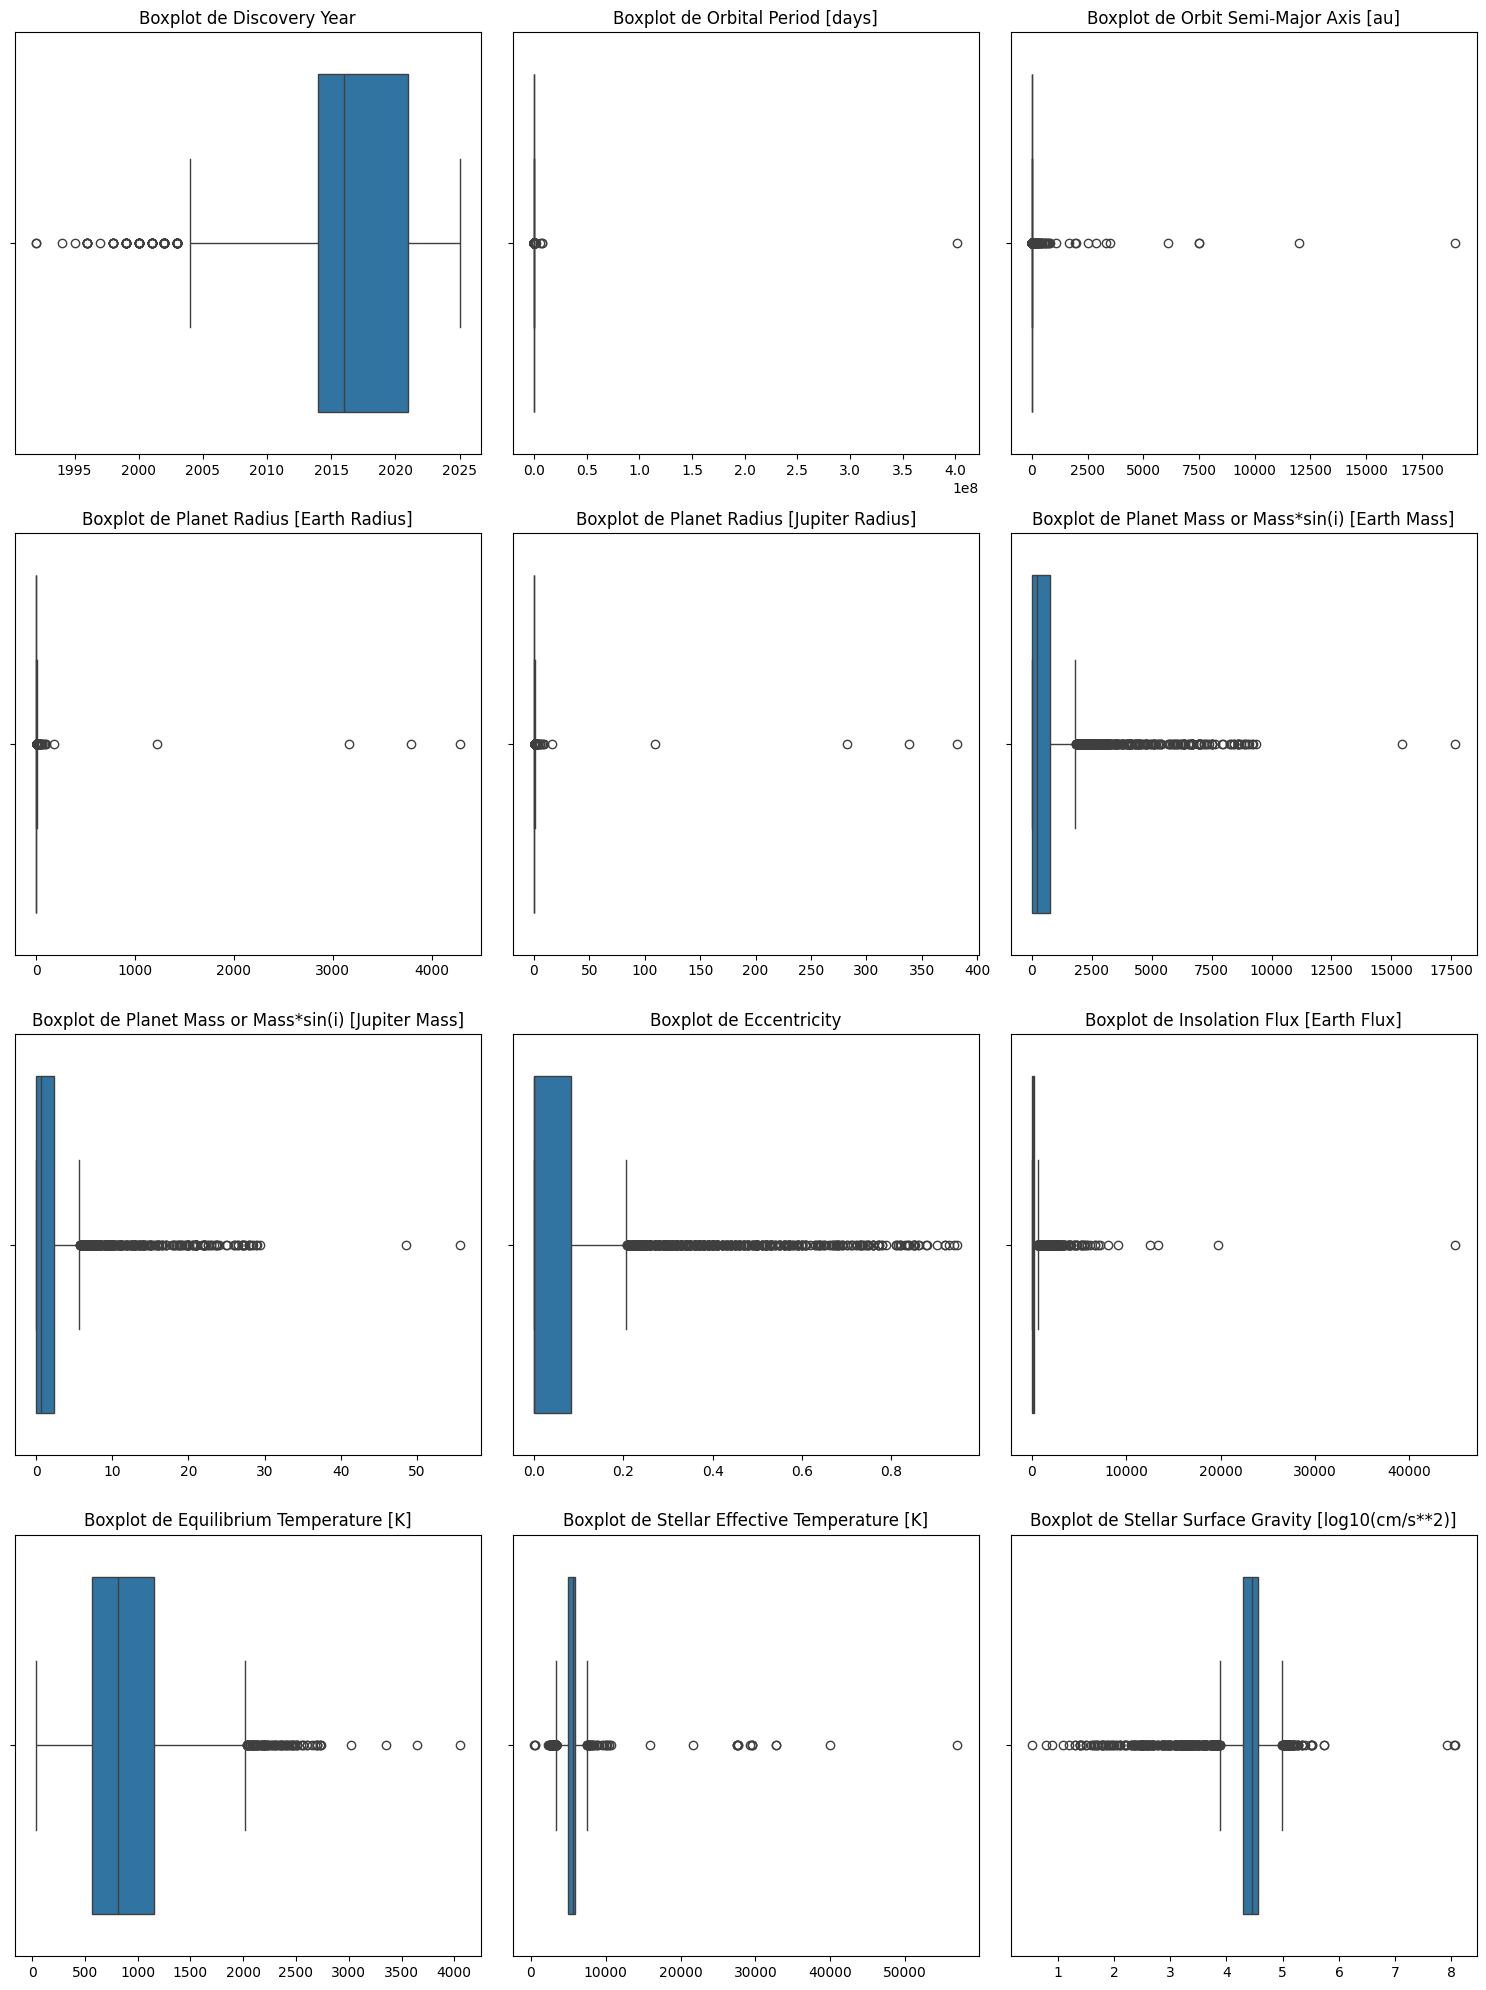

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques uniquement
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# Définir la taille de la grille d'affichage
n_cols = 3
n_rows = (len(colonnes_numeriques) + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for i, col in enumerate(colonnes_numeriques, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel('')  # Pas de label x pour plus de clarté

plt.tight_layout()
plt.show()


10. Calculer la matrice de corrélation et afficher là avec la fonction heatmap() de seaborn. Y
a-t-il corrélation entre certaines variables ?

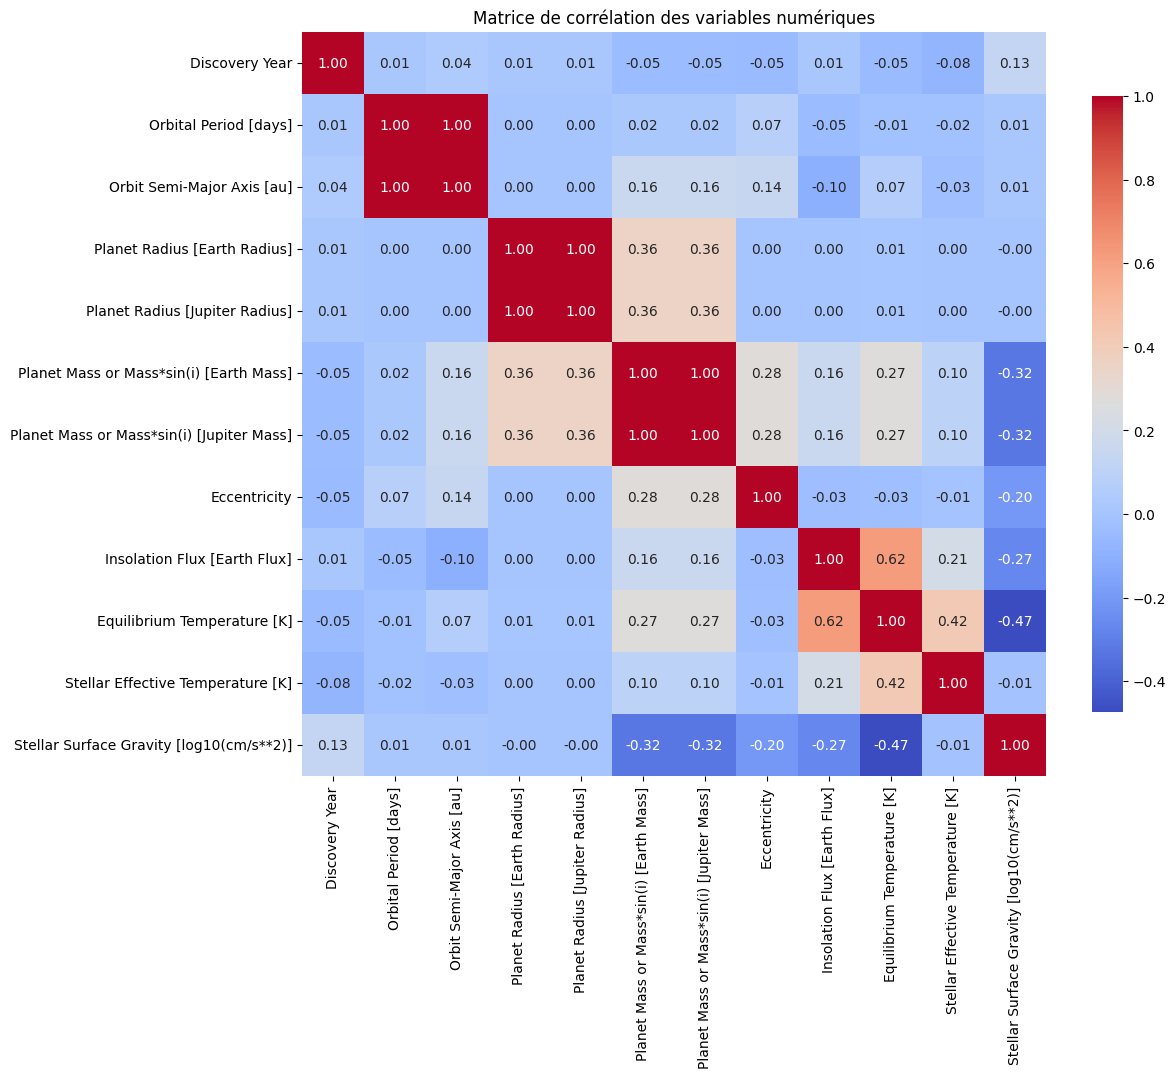

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# Calculer la matrice de corrélation (Pearson par défaut)
corr_matrix = df[colonnes_numeriques].corr()

# Afficher la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de corrélation des variables numériques")
plt.show()


6'.  Afficher le taux de remplissage de chaque colonne.


In [ ]:
colonnes_a_garder = [
    'Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
    'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]'
]

df_reduit = df[colonnes_a_garder].copy()

print(df_reduit.head())
#Afficher le taux de remplissage de chaque colonne.
for col, taux in taux_remplissage.items():
    print(f"{col}: {taux:.2f}% rempli")

  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

7'. Repérer où sont les valeurs nulles et proposer une explication. Est-ce que ces valeurs n’existent pas ou est-ce qu’elle n’ont pas été remplies ?


In [ ]:
# Nombre de valeurs manquantes par colonne
valeurs_nulles = df_reduit.isnull().sum()
print(valeurs_nulles)
taux_null = df_reduit.isnull().mean() * 100
print(taux_null)


Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64
Planet Name                                   0.000000
Host Name                                     0.000000
Discovery Year                                0.000000
Discovery Method                              0.000000
Orbital Period [d

| Colonne                                           | % de valeurs manquantes | Niveau          | Explication                                                                                                                     |
|--------------------------------------------------|-------------------------|-----------------|---------------------------------------------------------------------------------------------------------------------------------|
| Planet Name, Host Name, Discovery Year, Discovery Method | 0%                      | Fondamental     | Ces informations sont fondamentales et toujours renseignées : nom de la planète, étoile hôte, méthode et année découverte sont essentielles et faciles à obtenir. |
| Orbital Period [days]                             | ~5%                     | Faible taux     | La période orbitale nécessite des observations répétées sur plusieurs cycles, donc certaines planètes peuvent ne pas avoir encore assez de données pour être mesurées. |
| Orbit Semi-Major Axis [au]                        | ~6%                     | Faible taux     | Mesure similaire à la période orbitale, parfois déduite ou estimée, mais peut manquer si données orbitales précises absentes.   |
| Planet Radius [Earth/Jupiter Radius]              | ~25%                    | Moyenne         | La taille des planètes est souvent plus difficile à mesurer, surtout pour les exoplanètes découvertes par certaines méthodes (ex: vitesse radiale, pas de transit visible). |
| Planet Mass or Mass*sin(i) [Earth/Jupiter Mass]  | ~54%                    | Très élevé      | La masse est particulièrement difficile à mesurer, surtout pour les planètes non détectées par transit (qui ne donnent pas le rayon) mais par vitesse radiale, ou si les données sont incomplètes. |
| Eccentricity                                     | ~16%                    | Moyenne         | L’excentricité orbitale demande une modélisation fine des données orbitales, parfois non disponible ou non fiable pour certains objets. |
| Insolation Flux [Earth Flux]                      | ~42%                    | Élevé           | Ce flux dépend à la fois de la distance à l’étoile et des caractéristiques stellaires. Si l’une de ces données manque, ce flux ne peut pas être calculé. |
| Equilibrium Temperature [K]                       | ~28%                    | Élevé           | Calculée à partir de la luminosité de l’étoile et de la distance orbitale, donc souvent absente si les données orbitales ou stellaires manquent. |
| Stellar Effective Temperature [K]                 | ~7.7%                   | Faible          | Donnée généralement disponible, mais peut manquer pour étoiles moins étudiées ou mal cataloguées.                               |
| Stellar Surface Gravity [log10(cm/s²)]            | ~11.7%                  | Faible à moyenne| Mesure plus fine de l’étoile, peut manquer si les données spectroscopiques ne sont pas précises ou absentes.                     |



Les données fondamentales (noms, méthode, année) sont complètes, car elles sont essentielles à l’enregistrement et à la classification des objets.

Les paramètres orbitales de base sont souvent connus mais parfois manquants pour des exoplanètes récemment découvertes ou difficiles à observer.

Les caractéristiques physiques des planètes (rayon, masse) sont souvent absentes parce qu’elles demandent des méthodes spécifiques (ex: transit, vitesse radiale) et des observations longues et précises.

Les données stellaires et calculées (flux, température d’équilibre) sont manquantes surtout parce qu’elles dépendent des autres mesures orbitale et stellaire.

En résumé, les valeurs manquantes reflètent principalement les limites observationnelles et méthodologiques dans la collecte des données d’exoplanètes.



Combien y a-t-il de planètes différentes découvertes ?

In [ ]:
nombre_planetes = df['Planet Name'].nunique()
print(f"Nombre de planètes différentes découvertes : {nombre_planetes}")


Nombre de planètes différentes découvertes : 5903


In [ ]:
print(df.columns)


Index(['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
       'Orbital Period [days]', 'Orbit Semi-Major Axis [au]',
       'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]',
       'Planet Mass or Mass*sin(i) [Earth Mass]',
       'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity',
       'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]',
       'Stellar Effective Temperature [K]',
       'Stellar Surface Gravity [log10(cm/s**2)]'],
      dtype='object')


11. En quelle année a-t-on découvert le plus d’exoplanètes ?


In [ ]:
df.head()

,Planet Name,Host Name,Discovery Year,Discovery Method,Orbital Period [days],Orbit Semi-Major Axis [au],Planet Radius [Earth Radius],Planet Radius [Jupiter Radius],Planet Mass or Mass*sin(i) [Earth Mass],Planet Mass or Mass*sin(i) [Jupiter Mass],Eccentricity,Insolation Flux [Earth Flux],Equilibrium Temperature [K],Stellar Effective Temperature [K],Stellar Surface Gravity [log10(cm/s**2)]
0,11 Com b,11 Com,2007,Radial Velocity,326.03000,1.29,NaN,NaN,6165.6000,19.40,0.231,NaN,NaN,4742.0,2.31
1,11 UMi b,11 UMi,2009,Radial Velocity,516.21997,1.53,NaN,NaN,4684.8142,14.74,0.080,NaN,NaN,4213.0,1.93
2,14 And b,14 And,2008,Radial Velocity,185.84000,0.83,NaN,NaN,1525.5000,4.80,0.000,NaN,NaN,4813.0,2.63
3,14 Her b,14 Her,2002,Radial Velocity,1773.40002,2.93,NaN,NaN,1481.0878,4.66,0.370,NaN,NaN,5338.0,4.45
4,16 Cyg B b,16 Cyg B,1996,Radial Velocity,798.50000,1.66,NaN,NaN,565.7374,1.78,0.680,NaN,NaN,5750.0,4.36


In [ ]:
# Compter le nombre de planètes découvertes par année
decouvertes_par_annee = df['Discovery Year'].value_counts()


# Trouver l'année avec le plus de découvertes
annee_max = decouvertes_par_annee.idxmax()
max_decouvertes = decouvertes_par_annee.max()

print(f"L'année avec le plus de découvertes est {annee_max} avec {max_decouvertes} exoplanètes découvertes.")


L'année avec le plus de découvertes est 2016 avec 1496 exoplanètes découvertes.


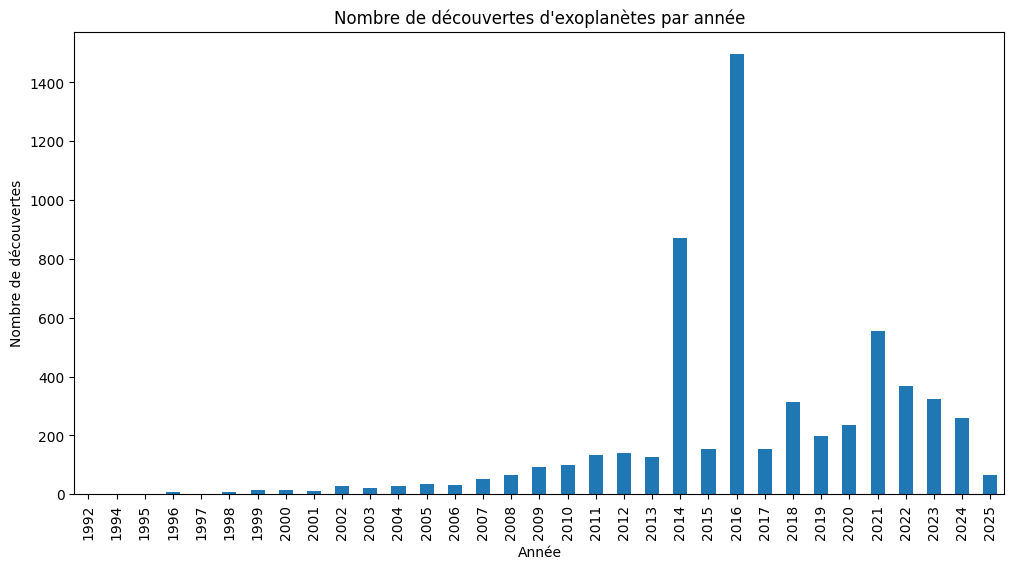

In [ ]:
import matplotlib.pyplot as plt

decouvertes_par_annee.sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Nombre de découvertes d'exoplanètes par année")
plt.xlabel("Année")
plt.ylabel("Nombre de découvertes")
plt.show()


# Analyse univariée et bivariée


13. Tracer la distribution de chaque indicateur (fonction histplot() de seaborn)


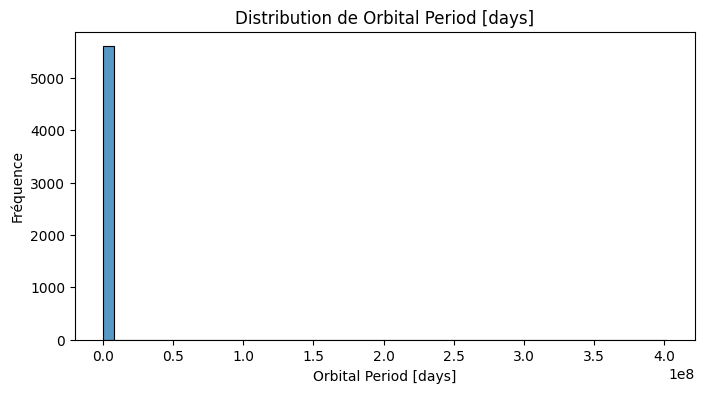

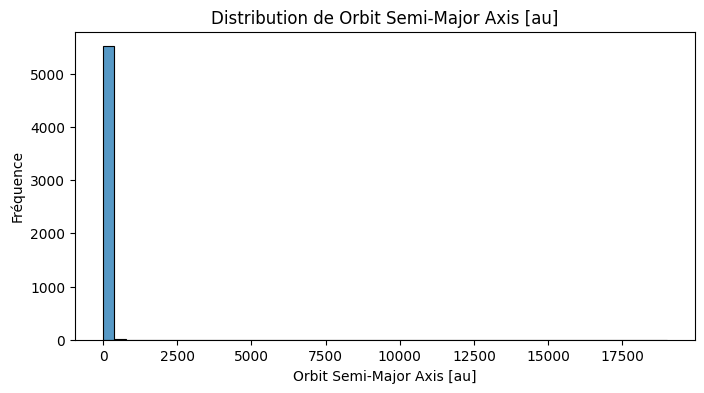

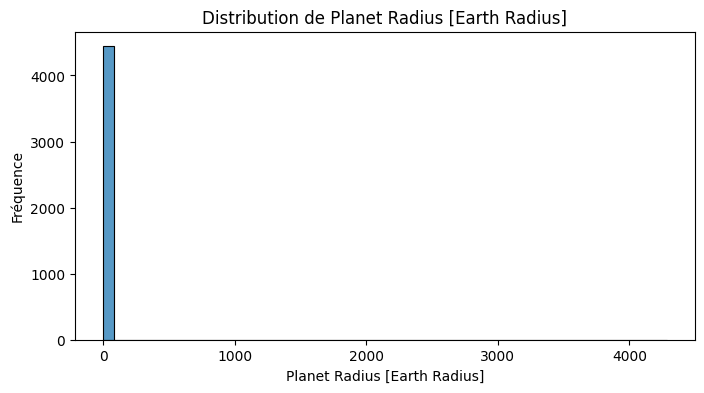

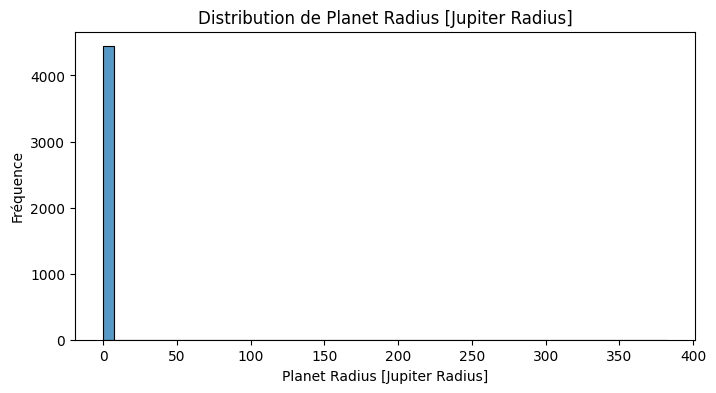

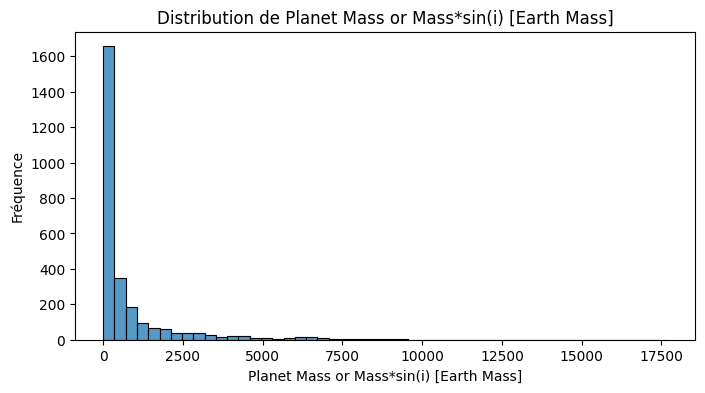

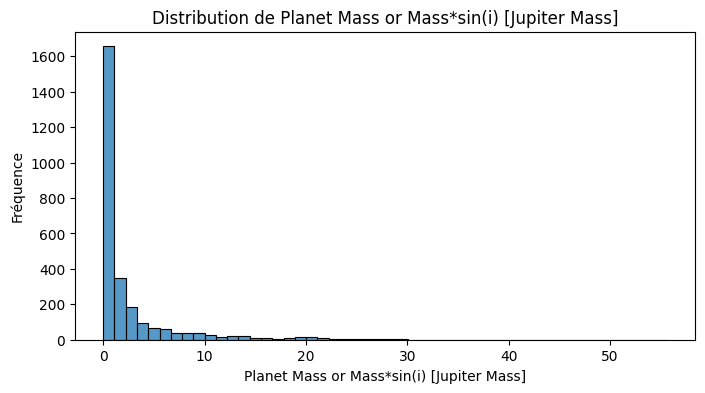

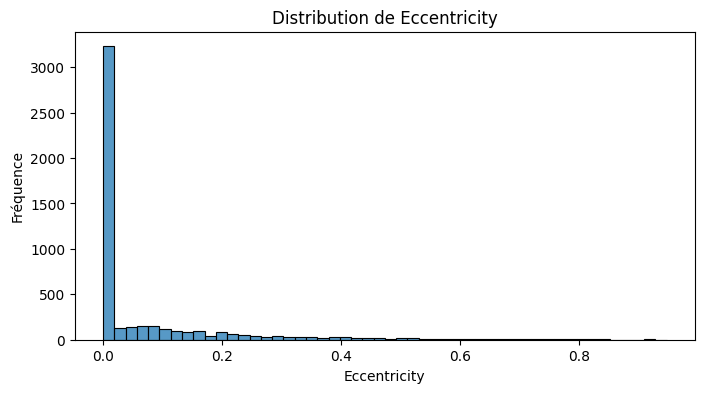

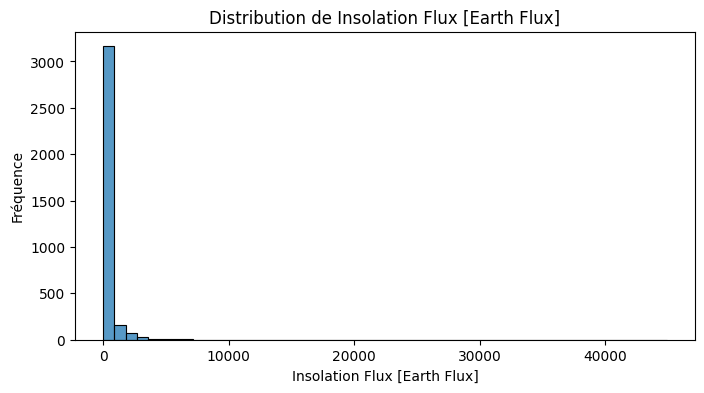

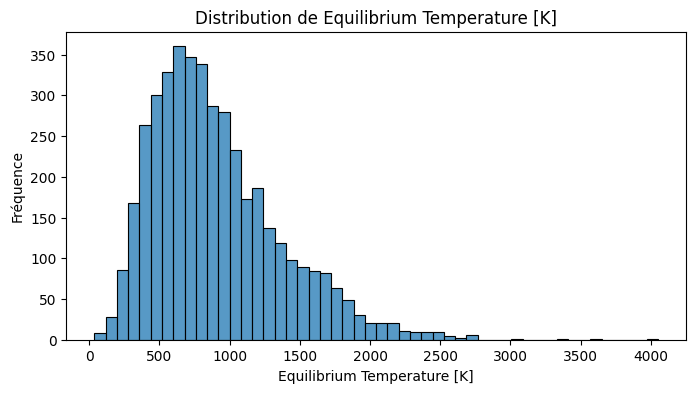

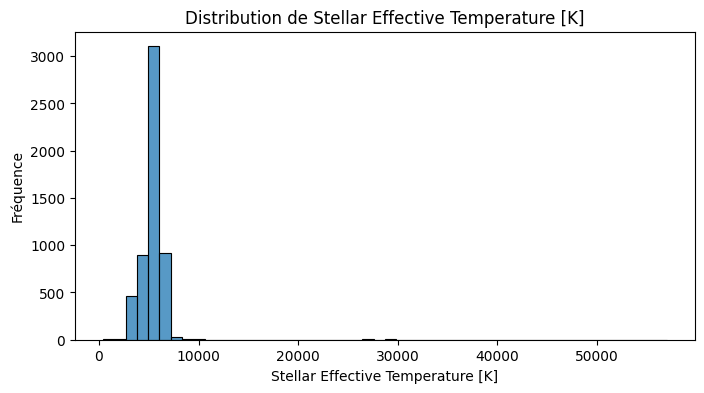

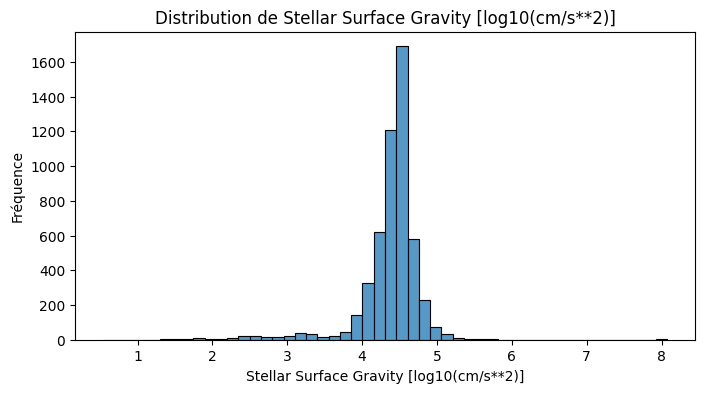

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que ton DataFrame s'appelle df
colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

# Tracer un histogramme par colonne
for col in colonnes_numeriques:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=50, kde=False)
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


14. Tracer un boxplot pour chaque indicateur (fonction boxplot() de seaborn)


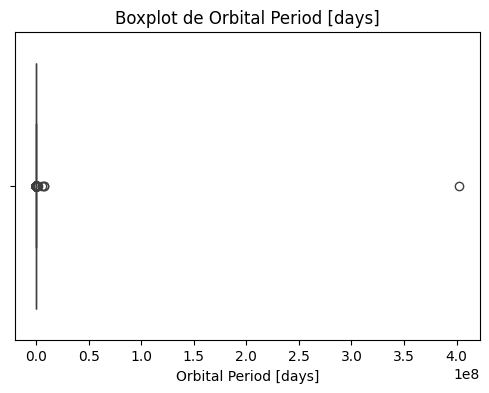

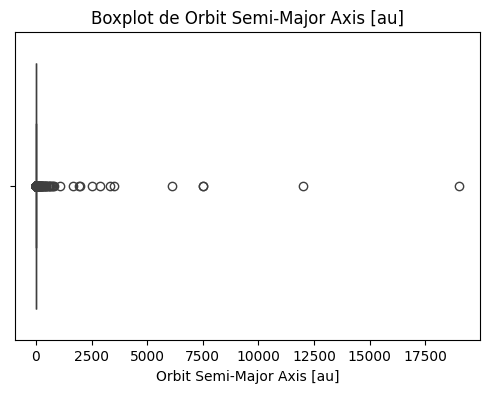

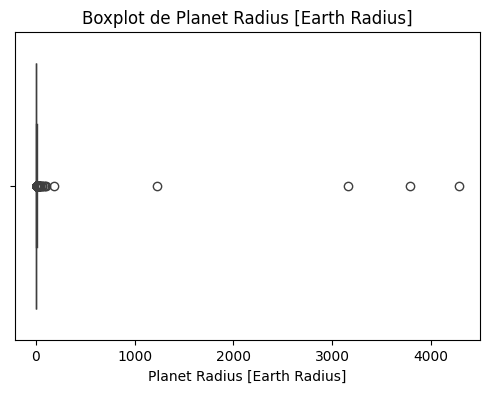

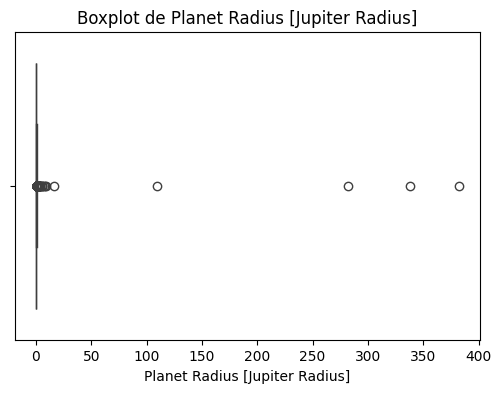

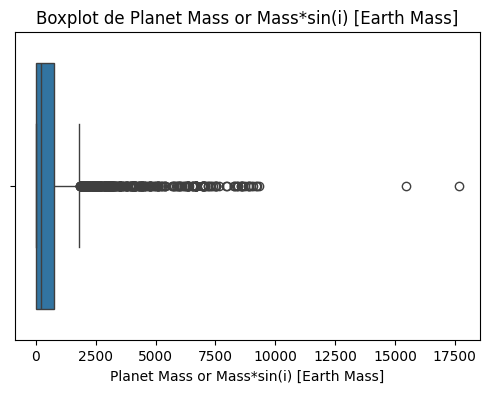

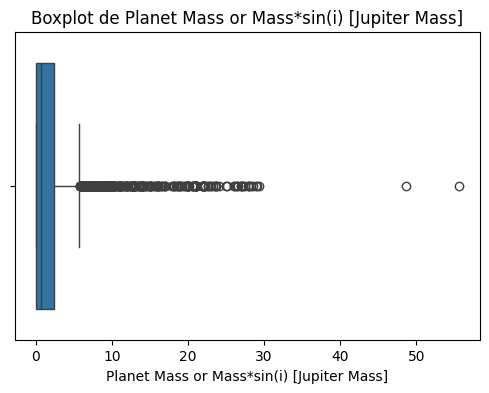

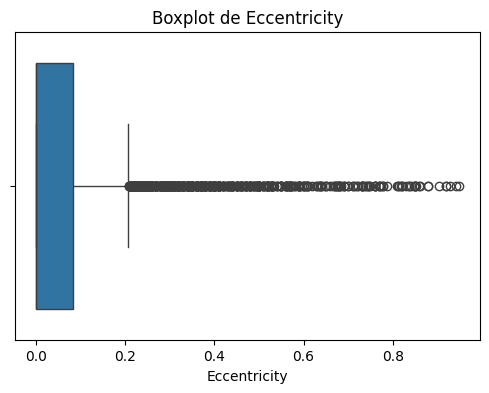

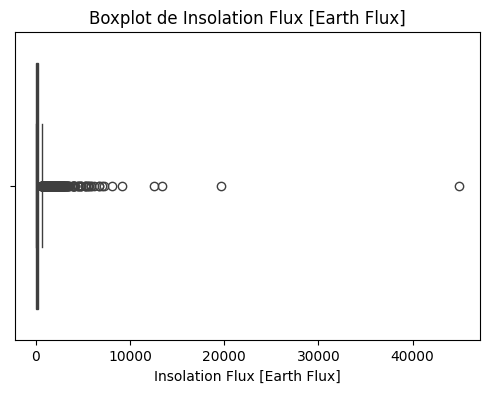

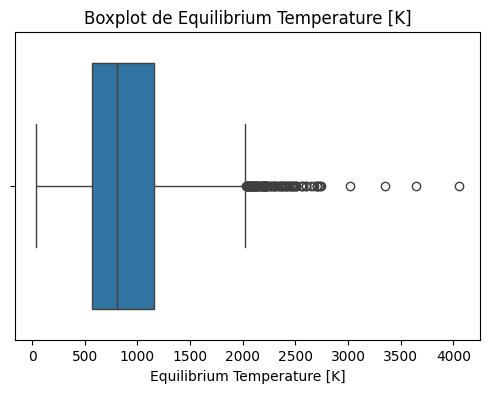

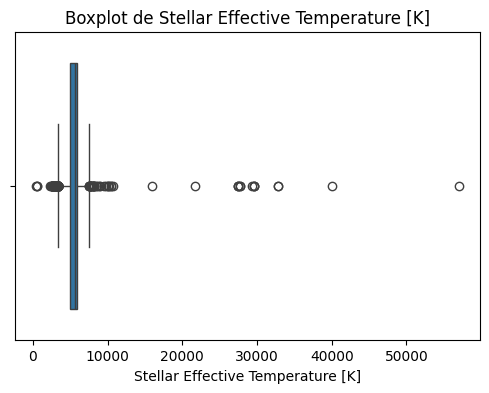

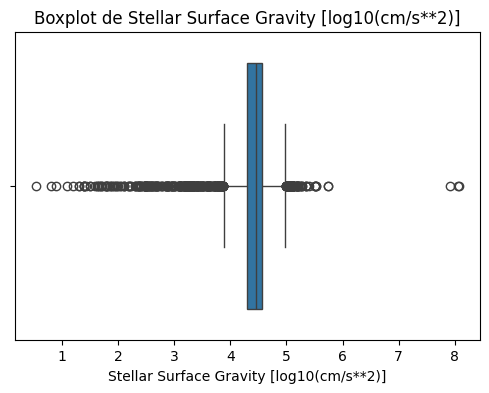

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

for col in colonnes_numeriques:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)
    plt.show()


15. Calculer la matrice de corrélation et afficher là avec la fonction heatmap() de seaborn. Y a-t-il corrélation entre certaines variables ?


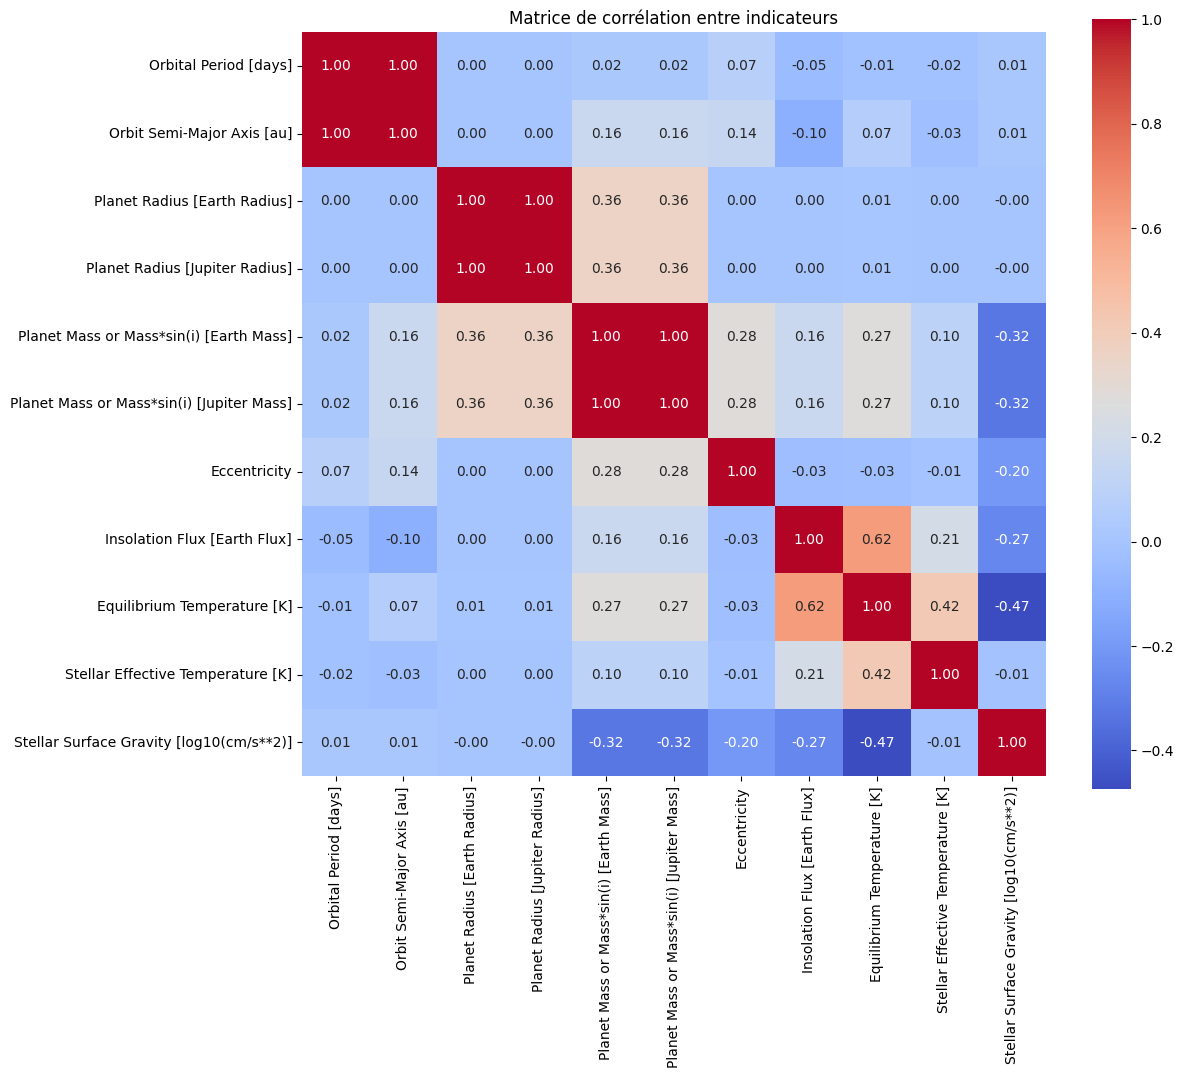

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionner les colonnes numériques (les mêmes que pour les boxplots)
colonnes_numeriques = [
    'Orbital Period [days]',
    'Orbit Semi-Major Axis [au]',
    'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]',
    'Eccentricity',
    'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]',
    'Stellar Effective Temperature [K]',
    'Stellar Surface Gravity [log10(cm/s**2)]'
]

# Calculer la matrice de corrélation (Pearson par défaut)
corr_matrix = df[colonnes_numeriques].corr()

# Afficher la heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation entre indicateurs")
plt.show()


11. La troisième loi de Kepler est-elle vérifiée dans le dataset ?

1. La 3ᵉ loi de Kepler dit que pour une planète orbitant autour d’une étoile, la période orbitale au carré est proportionnelle au cube du demi-grand axe de l’orbite.
2. Formuler un problème de classification SVM
L’idée est d’utiliser un SVM pour classifier si une ligne du dataset respecte ou non la loi, par exemple :

Classe 1 : données "cohérentes" avec la loi (relation proche de
P^2 = a^3

Classe 0 : données "non cohérentes" (écart trop grand)

3. Préparer les données
 1. Calculer
𝑃^2 et 𝑎^3 à partir des colonnes pl_orbper et pl_orbsmax.
  2. Calculer une métrique d’erreur
  3. Choisir un seuil pour définir "cohérent" ou pas.
  4. Interprétation :
    1. Si le SVM classifie bien, cela signifie qu’il y a une séparation nette entre données qui respectent ou pas la loi.

    2. Si la classification est mauvaise, soit la loi n’est pas bien respectée dans les données (par ex. données bruitées), soit il faut affiner la préparation.

In [ ]:
# Vérifier les noms exacts des colonnes
print(df.columns.tolist())

['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method', 'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]', 'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]']


print(y.value_counts())


Cela indique que la majorité de tes données ont une erreur log(P²/a³) très grande, alors que si la 3ᵉ loi de Kepler était respectée, on devrait avoir log(P²) ≈ log(a³), donc erreur proche de 0.

In [ ]:
import numpy as np

# Recalcul à partir des bonnes colonnes
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculer P^2 et a^3
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Erreur relative en log
erreur = np.abs(np.log(P2) - np.log(a3))


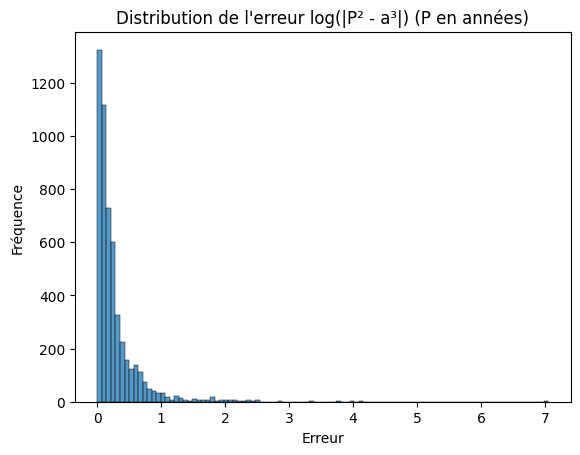

In [ ]:
# Convertir la période en années
P_years = df_kepler['Orbital Period [days]'] / 365.25

# Recalculer P^2 et a^3 avec bonnes unités
P2 = P_years ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Recalculer l'erreur log
erreur = np.abs(np.log(P2) - np.log(a3))

# Visualiser à nouveau
sns.histplot(erreur, bins=100)
plt.title("Distribution de l'erreur log(|P² - a³|) (P en années)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.show()


La 3ᵉ loi de Kepler est globalement vérifiée dans ton dataset !
L’erreur étant définie par
∣
log
⁡
(
𝑃
2
)
−
log
⁡
(
𝑎
3
)
∣
∣log(P
2
 )−log(a
3
 )∣, elle est proche de 0 pour la grande majorité des données.

Cela indique que
𝑃
2
≈
𝑎
3
P
2
 ≈a
3
 , ce qui confirme la loi de Kepler dans les unités correctes (P en années, a en unités astronomiques).

# Modèle de classification SVM

In [ ]:
colonnes_a_garder = [
    'Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method',
    'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]',
    'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]',
    'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]'
]

df_reduit = df[colonnes_a_garder].copy()

print(df_reduit.head())



  Planet Name Host Name  Discovery Year Discovery Method  \
0    11 Com b    11 Com            2007  Radial Velocity   
1    11 UMi b    11 UMi            2009  Radial Velocity   
2    14 And b    14 And            2008  Radial Velocity   
3    14 Her b    14 Her            2002  Radial Velocity   
4  16 Cyg B b  16 Cyg B            1996  Radial Velocity   

   Orbital Period [days]  Orbit Semi-Major Axis [au]  \
0              326.03000                        1.29   
1              516.21997                        1.53   
2              185.84000                        0.83   
3             1773.40002                        2.93   
4              798.50000                        1.66   

   Planet Radius [Earth Radius]  Planet Radius [Jupiter Radius]  \
0                           NaN                             NaN   
1                           NaN                             NaN   
2                           NaN                             NaN   
3                           NaN   

In [ ]:
print(df_reduit.isnull().sum())  # Combien de valeurs manquantes par colonne ?
df_clean = df_reduit.dropna(subset=['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']).copy()
# On garde uniquement les lignes avec période orbitale et demi-grand axe connus


Planet Name                                     0
Host Name                                       0
Discovery Year                                  0
Discovery Method                                0
Orbital Period [days]                         297
Orbit Semi-Major Axis [au]                    364
Planet Radius [Earth Radius]                 1456
Planet Radius [Jupiter Radius]               1456
Planet Mass or Mass*sin(i) [Earth Mass]      3199
Planet Mass or Mass*sin(i) [Jupiter Mass]    3199
Eccentricity                                  955
Insolation Flux [Earth Flux]                 2453
Equilibrium Temperature [K]                  1647
Stellar Effective Temperature [K]             454
Stellar Surface Gravity [log10(cm/s**2)]      690
dtype: int64


In [ ]:
#Calculer P², a³ et l’erreur relative en log
import numpy as np

df_kepler['P2'] = df_kepler['Orbital Period [days]'] ** 2
df_kepler['a3'] = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

df_kepler['erreur'] = np.abs(np.log(df_kepler['P2']) - np.log(df_kepler['a3']))



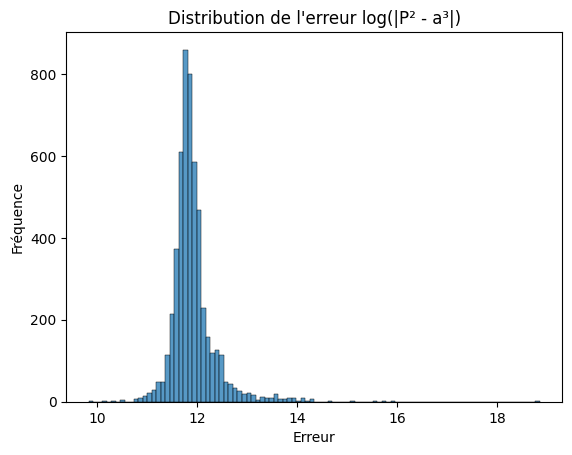

In [ ]:
#Visualiser la distribution des erreurs
#Cette visualisation va m’aider à fixer un seuil pertinent.
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_kepler['erreur'], bins=100)
plt.title("Distribution de l'erreur log(|P² - a³|)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.show()


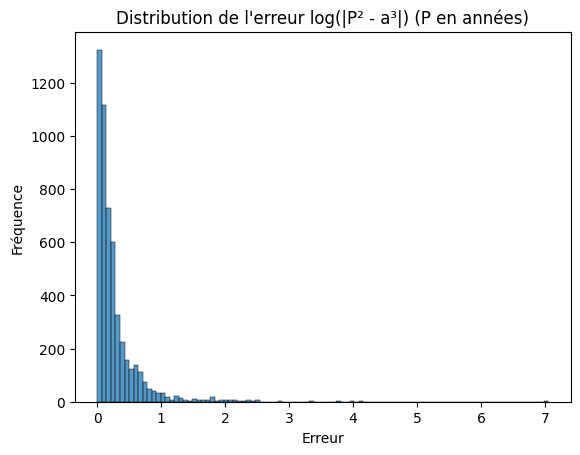

In [ ]:
# Convertir la période en années pour avoir la bonne fréquence d'erreur
P_years = df_kepler['Orbital Period [days]'] / 365.25

# Recalculer P^2 et a^3 avec bonnes unités
P2 = P_years ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Recalculer l'erreur log
erreur = np.abs(np.log(P2) - np.log(a3))

# Visualiser à nouveau
sns.histplot(erreur, bins=100)
plt.title("Distribution de l'erreur log(|P² - a³|) (P en années)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.show()


In [ ]:
#Créer la variable cible « label » selon un seuil
seuil = 0.1  # ou un autre seuil que tu choisis selon la distribution

df_kepler['label'] = (df_kepler['erreur'] < seuil).astype(int)


In [ ]:
#quel seuil est raisonnable
erreur = np.abs(np.log(P2) - np.log(a3))
print(erreur.describe())


count    5252.000000
mean        0.268214
std         0.358523
min         0.000009
25%         0.069924
50%         0.159291
75%         0.312942
max         7.054719
dtype: float64


# Ajuster le seuil dynamiquement
Tu peux prendre un seuil basé sur la médiane ou un quantile. Par exemple : classer les 30 % d’exoplanètes les plus proches de la loi de Kepler comme "cohérentes".

In [ ]:
# Supposons que P2 et a3 sont déjà définis
erreur = np.abs(np.log(P2) - np.log(a3))

# Définir un seuil comme le 30e percentile
seuil = np.percentile(erreur, 30)
print(f"Seuil dynamique utilisé : {seuil:.4f}")

# Créer les labels
labels = (erreur < seuil).astype(int)

# Vérifier la répartition des classes
print(labels.value_counts())


Seuil dynamique utilisé : 0.0836
0    3676
1    1576
Name: count, dtype: int64


3676 exoplanètes incohérentes (label 0)

1576 exoplanètes cohérentes (label 1)

In [ ]:
# Nettoyer les données : supprimer les lignes avec NaN dans les colonnes utilisées
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculer P2 et a3
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3

# Calculer erreur
erreur = np.abs(np.log(P2) - np.log(a3))


Meme avec seulement 50 données c'est beaucoup trop long en SVM

In [ ]:
#Ne pas lancer
#Réduction à 50
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Données P2 et a3 déjà calculées
# erreur déjà calculée : erreur = np.abs(np.log(P2) - np.log(a3))

# Créer les labels
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Créer X et y
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# Équilibrer les classes par échantillonnage, max 50 par classe pour accélérer
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1), 50)  # max 50

X_sample = pd.concat([
    X_0.sample(n, random_state=42),
    X_1.sample(n, random_state=42)
])
y_sample = y.loc[X_sample.index]

# Mélanger
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]

# Diviser en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Entraîner le SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Exemple avec K-Means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Nettoyage
df_kepler = df[['Orbital Period [days]', 'Orbit Semi-Major Axis [au]']].dropna()

# Calculs
P2 = df_kepler['Orbital Period [days]'] ** 2
a3 = df_kepler['Orbit Semi-Major Axis [au]'] ** 3
erreur = np.abs(np.log(P2) - np.log(a3))

# Création des labels pour comparaison
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Préparation des données
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# Échantillonnage équilibré (max 1000 par classe)
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1), 1000)
X_sample = pd.concat([X_0.sample(n, random_state=42), X_1.sample(n, random_state=42)])
y_sample = y.loc[X_sample.index]

# Mélange
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]


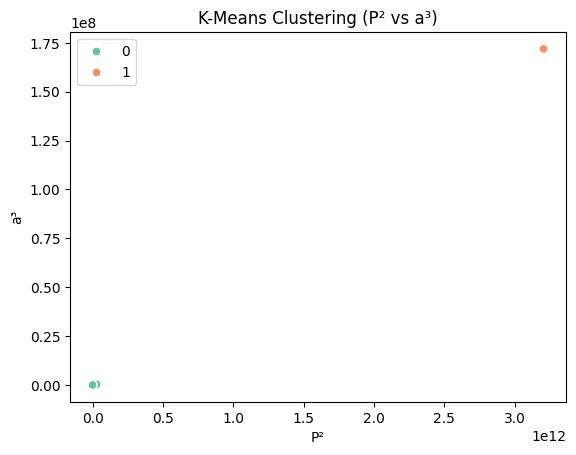

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_sample)

clusters = kmeans.labels_

# Visualisation
sns.scatterplot(data=X_sample, x='P2', y='a3', hue=clusters, palette='Set2')
plt.title("K-Means Clustering (P² vs a³)")
plt.xlabel("P²")
plt.ylabel("a³")
plt.show()



In [ ]:
# Vérification du nombre de points par classe
nb_0 = len(X_0)
nb_1 = len(X_1)

print(f"Nombre d'exemples dans la classe 0 : {nb_0}")
print(f"Nombre d'exemples dans la classe 1 : {nb_1}")

# Vérifie que les deux classes ont au moins 1000 échantillons
if nb_0 < 1000 or nb_1 < 1000:
    print(" Pas assez d'exemples dans au moins une des classes pour un échantillon de 1000.")
    n = min(nb_0, nb_1)  # Ajustement automatique
    print(f"💡 Utilisation de n = {n} pour équilibrer.")
else:
    n = 1000


Nombre d'exemples dans la classe 0 : 3676
Nombre d'exemples dans la classe 1 : 1576


In [ ]:
print(y_sample.value_counts())


1    1000
0    1000
Name: count, dtype: int64


In [ ]:
#Ne pas lancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Données P2 et a3 déjà calculées
# erreur déjà calculée : erreur = np.abs(np.log(P2) - np.log(a3))

# Créer les labels
seuil = np.percentile(erreur, 30)
labels = (erreur < seuil).astype(int)

# Créer X et y
X = pd.DataFrame({'P2': P2, 'a3': a3})
y = labels

# Équilibrer les classes par échantillonnage
X_0 = X[y == 0]
X_1 = X[y == 1]
n = min(len(X_0), len(X_1))

X_sample = pd.concat([
    X_0.sample(n, random_state=42),
    X_1.sample(n, random_state=42)
])
y_sample = y.loc[X_sample.index]

# Mélanger
X_sample = X_sample.sample(frac=1, random_state=42)
y_sample = y_sample.loc[X_sample.index]

# Diviser en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Entraîner le SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


17.  Tracer le graphique

<ipython-input-39-5c17a94913bb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="viridis")


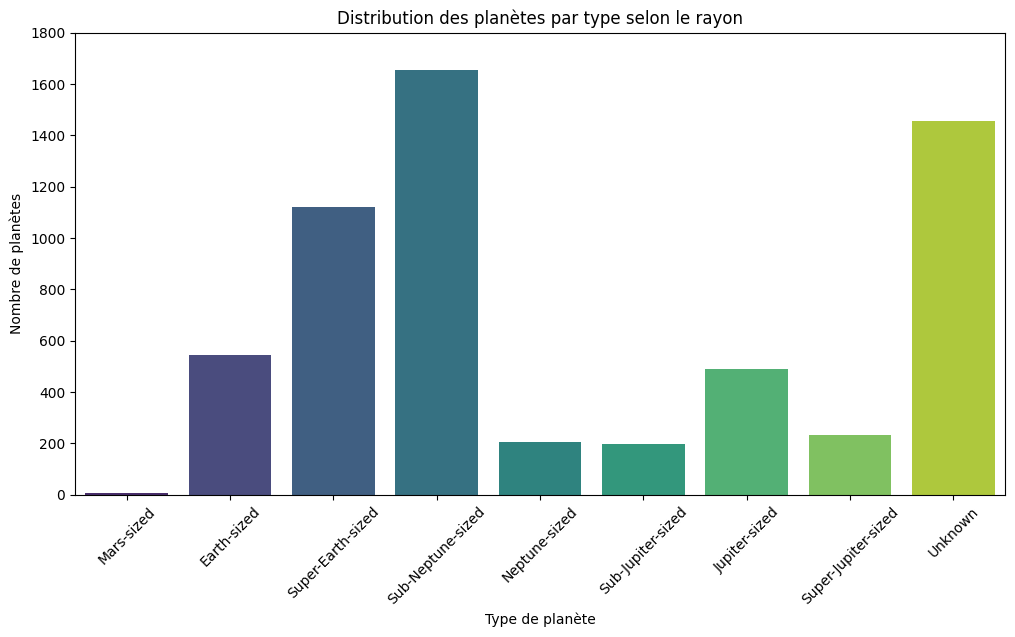

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = df[colonnes_a_garder]

# Définition des seuils en Earth Radius pour les types de planètes
def get_planet_type(radius):
    if pd.isna(radius):
        return "Unknown"
    if radius < 0.5:
        return "Mars-sized"
    elif radius < 1.25:
        return "Earth-sized"
    elif radius < 2.0:
        return "Super-Earth-sized"
    elif radius < 4.0:
        return "Sub-Neptune-sized"
    elif radius < 6.0:
        return "Neptune-sized"
    elif radius < 10.0:
        return "Sub-Jupiter-sized"
    elif radius < 15.0:
        return "Jupiter-sized"
    else:
        return "Super-Jupiter-sized"

# Créer la colonne planet_type à partir du rayon en Earth Radius
df['planet_type'] = df['Planet Radius [Earth Radius]'].apply(get_planet_type)

# Compter le nombre de planètes par type
counts = df['planet_type'].value_counts().sort_index()

# Créer un dataframe pour le plot, avec les labels dans l'ordre souhaité
labels_order = [
    "Mars-sized", "Earth-sized", "Super-Earth-sized", "Sub-Neptune-sized",
    "Neptune-sized", "Sub-Jupiter-sized", "Jupiter-sized", "Super-Jupiter-sized", "Unknown"
]

counts = counts.reindex(labels_order).fillna(0)

# Tracer le barplot
plt.figure(figsize=(12,6))
sns.barplot(x=counts.index, y=counts.values, palette="viridis")

# Ajuster l'axe y pour avoir un pas de 200 (et un max arrondi)
max_y = counts.max()
plt.yticks(range(0, int(max_y + 200), 200))
plt.xlabel("Type de planète")
plt.ylabel("Nombre de planètes")
plt.title("Distribution des planètes par type selon le rayon")
plt.xticks(rotation=45)
plt.show()


18. Partout où c’est possible, calculez la densité de la planète avec la formule suivante, exprimant le rapport entre la masse de la planète et son volume :

avec :
Mp : masse de la planète (en g)
Rp : rayon de la planète (en cm)

	Remarques :  
le nombre π s’obtient, par exemple, avec numpy.pi
Attention, Mp et Rp  doivent d’abord être converties en kg et en mètre pour le calcul de la densité !


On part des données :

Masse en Terres (Earth Mass) ou en Jupiter Mass (à vérifier)

Rayon en Earth Radius (Rayon de la Terre) ou Jupiter Radius

On convertit tout en grammes (g) et centimètres (cm) pour avoir la densité en g/cm³.

Masse de la Terre
𝑀
⊕
=
5.972
×
10
24
M
⊕
​
 =5.972×10
24
  kg

Rayon de la Terre
𝑅
⊕
=
6.371
×
10
6
R
⊕
​
 =6.371×10
6
  m

1 kg = 1000 g

1 m = 100 cm

Masse en grammes :

𝑀
𝑝
(
𝑔
)
=
𝑀
𝑝
(
𝐸
𝑎
𝑟
𝑡
ℎ
𝑀
𝑎
𝑠
𝑠
)
×
5.972
×
10
24
×
1000
M
p
​
 (g)=M
p
​
 (EarthMass)×5.972×10
24
 ×1000
Rayon en cm :

𝑅
𝑝
(
𝑐
𝑚
)
=
𝑅
𝑝
(
𝐸
𝑎
𝑟
𝑡
ℎ
𝑅
𝑎
𝑑
𝑖
𝑢
𝑠
)
×
6.371
×
10
6
×
100
R
p
​
 (cm)=R
p
​
 (EarthRadius)×6.371×10
6
 ×100


In [ ]:
import numpy as np

# Constantes
MASS_EARTH_KG = 5.972e24  # kg
RADIUS_EARTH_M = 6.371e6   # m

# Conversion en g et cm
MASS_EARTH_G = MASS_EARTH_KG * 1000   # g
RADIUS_EARTH_CM = RADIUS_EARTH_M * 100 # cm

# Masse en grammes (si disponible en Earth Mass)
df['Mass_g'] = df['Planet Mass or Mass*sin(i) [Earth Mass]'] * MASS_EARTH_G

# Rayon en cm (si disponible en Earth Radius)
df['Radius_cm'] = df['Planet Radius [Earth Radius]'] * RADIUS_EARTH_CM

# Calcul volume en cm³
df['Volume_cm3'] = (4/3) * np.pi * (df['Radius_cm'] ** 3)

# Calcul densité (g/cm³)
df['Density_g_cm3'] = df['Mass_g'] / df['Volume_cm3']

# Gérer les cas où masse ou rayon est nul ou absent
df.loc[(df['Mass_g'].isna()) | (df['Radius_cm'].isna()) | (df['Radius_cm'] == 0), 'Density_g_cm3'] = np.nan

# Afficher un aperçu des densités calculées
print(df[['Planet Name', 'Density_g_cm3']].head(10))


               Planet Name  Density_g_cm3
0                 11 Com b            NaN
1                 11 UMi b            NaN
2                 14 And b            NaN
3                 14 Her b            NaN
4               16 Cyg B b            NaN
5                 17 Sco b            NaN
6                 18 Del b            NaN
7  1RXS J160929.1-210524 b       2.162359
8                 24 Boo b            NaN
9                 24 Sex b            NaN


18. Remplissez une nouvelle colonne “composition” avec les labels “rocky” (rocheux) ou “gaseous” (gazeux) suivant la densité de la planète. Pour information, voici les données des planètes du Système Solaire et leurs labels :

Pour remplir une colonne "composition" qui catégorise les planètes en rocky ou gaseous en fonction de leur densité, on peut utiliser une règle simple basée sur les densités des planètes du Système Solaire que tu as fournies.

Observations :
Les planètes rocheuses ont une densité ≥ 3.93 g/cm³ (Mars étant la plus faible rocheuse).

Les planètes gazeuses ont une densité ≤ 1.64 g/cm³ (Neptune étant la plus dense gazeuse).

Seuil à retenir
Pour classifier, un seuil simple est à mi-chemin entre 1.64 et 3.93, disons environ 3 g/cm³ :

Si densité ≥ 3 → rocky

Sinon → gaseous



In [ ]:
import numpy as np

# Conversion des unités Terre vers grammes et cm
M_earth_g = 5.972e27  # masse Terre en grammes
R_earth_cm = 6.371e8  # rayon Terre en cm

# Supposons que tes colonnes s'appellent 'Planet Mass or Mass*sin(i) [Earth Mass]' et 'Planet Radius [Earth Radius]'
mass_earth = df['Planet Mass or Mass*sin(i) [Earth Mass]']  # en masses Terre
radius_earth = df['Planet Radius [Earth Radius]']          # en rayons Terre

# Calcul masse en grammes
mass_g = mass_earth * M_earth_g

# Calcul rayon en cm
radius_cm = radius_earth * R_earth_cm

# Calcul du volume en cm^3 : (4/3) * pi * R^3
volume_cm3 = (4/3) * np.pi * radius_cm ** 3

# Calcul densité en g/cm^3
df['density'] = mass_g / volume_cm3

def composition_label(density):
    if density >= 3:
        return 'rocky'
    else:
        return 'gaseous'

df['composition'] = df['density'].apply(composition_label)


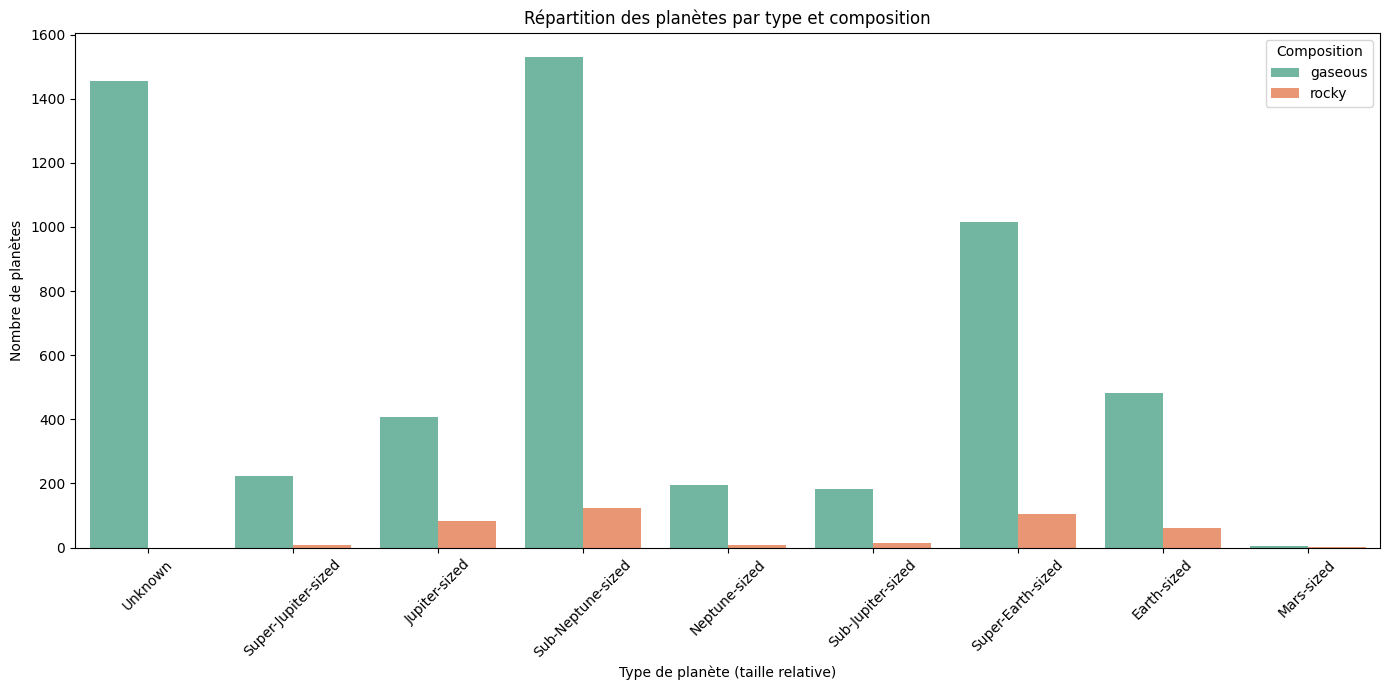

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que tu as déjà la colonne 'planet_type' dans df (ex: Mars-sized, Earth-sized, etc.)
# Sinon, on peut la créer aussi (je peux te rappeler comment faire si besoin)

# Visualisation : nombre de planètes par composition et par type
plt.figure(figsize=(14, 7))

sns.countplot(data=df, x='planet_type', hue='composition', palette='Set2')

plt.title('Répartition des planètes par type et composition')
plt.xlabel('Type de planète (taille relative)')
plt.ylabel('Nombre de planètes')
plt.xticks(rotation=45)
plt.legend(title='Composition')
plt.tight_layout()
plt.show()


20. Quel critère utiliser pour remplir les labels sur la composition à partir des planètes du système solaire ? Vous pourrez utiliser un critère de seuil et un algorithme de classification supervisée, entraîné sur les données du système solaire, puis comparer les résultats.


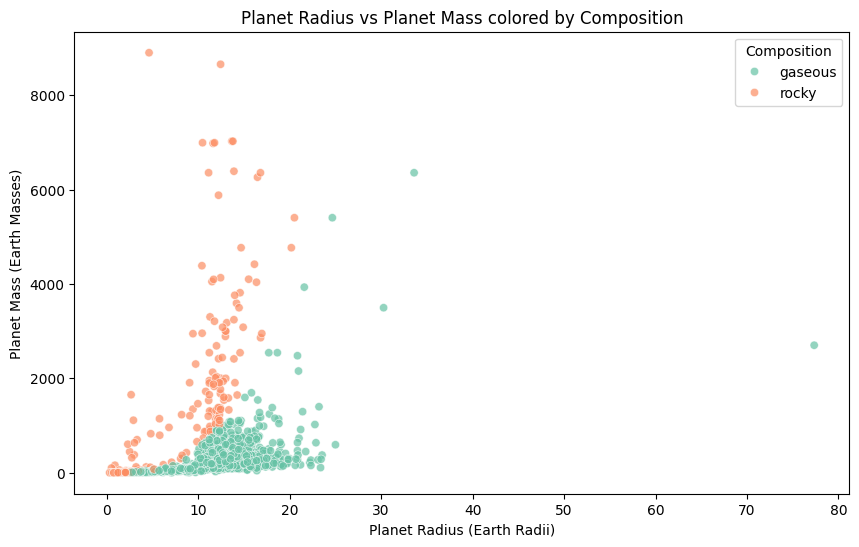

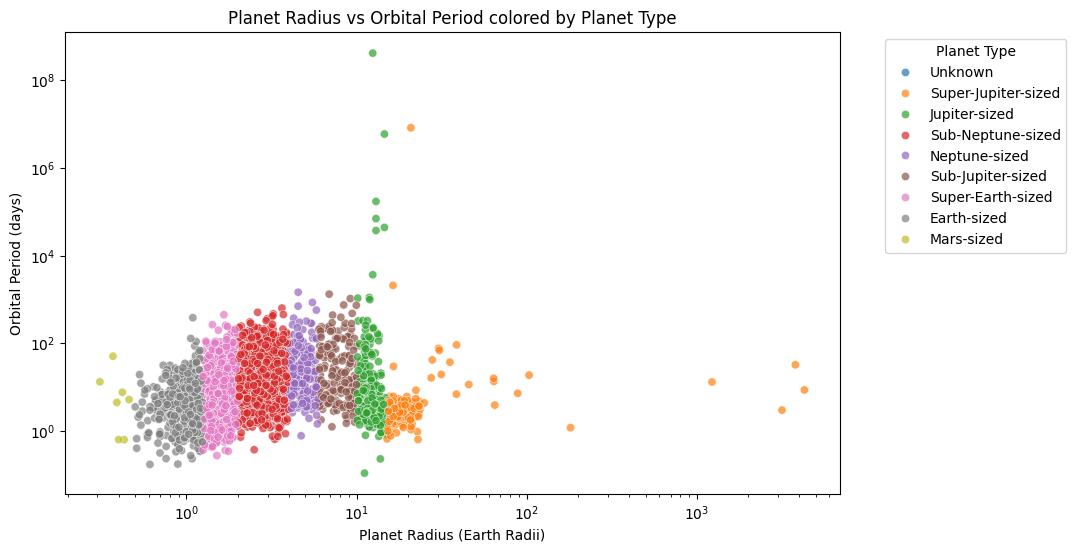

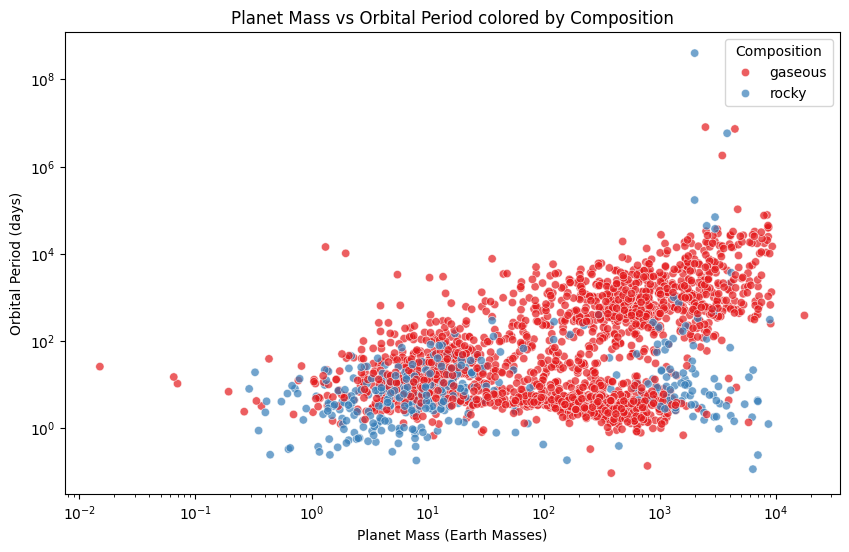

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple 1 : Rayon vs Masse, coloré par composition
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    hue='composition',
    palette='Set2',
    alpha=0.7
)
plt.title('Planet Radius vs Planet Mass colored by Composition')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.legend(title='Composition')
plt.show()

# Exemple 2 : Rayon vs Période orbitale, coloré par planet_type
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Radius [Earth Radius]',
    y='Orbital Period [days]',
    hue='planet_type',
    palette='tab10',
    alpha=0.7
)
plt.title('Planet Radius vs Orbital Period colored by Planet Type')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')  # Ajouté pour échelle log en X pour mieux voir
plt.legend(title='Planet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # échelle log utile pour la période orbitale
plt.show()

# Exemple 3 : Masse vs Période orbitale, coloré par composition
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Planet Mass or Mass*sin(i) [Earth Mass]',
    y='Orbital Period [days]',
    hue='composition',
    palette='Set1',
    alpha=0.7
)
plt.title('Planet Mass vs Orbital Period colored by Composition')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Orbital Period (days)')
plt.legend(title='Composition')
plt.yscale('log')
plt.xscale('log')  # masse souvent très variable => échelle log
plt.show()



In [ ]:
print(df.columns.tolist())


['Planet Name', 'Host Name', 'Discovery Year', 'Discovery Method', 'Orbital Period [days]', 'Orbit Semi-Major Axis [au]', 'Planet Radius [Earth Radius]', 'Planet Radius [Jupiter Radius]', 'Planet Mass or Mass*sin(i) [Earth Mass]', 'Planet Mass or Mass*sin(i) [Jupiter Mass]', 'Eccentricity', 'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]', 'Stellar Effective Temperature [K]', 'Stellar Surface Gravity [log10(cm/s**2)]', 'planet_type', 'Mass_g', 'Radius_cm', 'Volume_cm3', 'Density_g_cm3', 'density', 'composition']


In [ ]:
df_clean = df.dropna(subset=[
    'Planet Radius [Earth Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Orbital Period [days]',
    'planet_type',
    'composition'
])


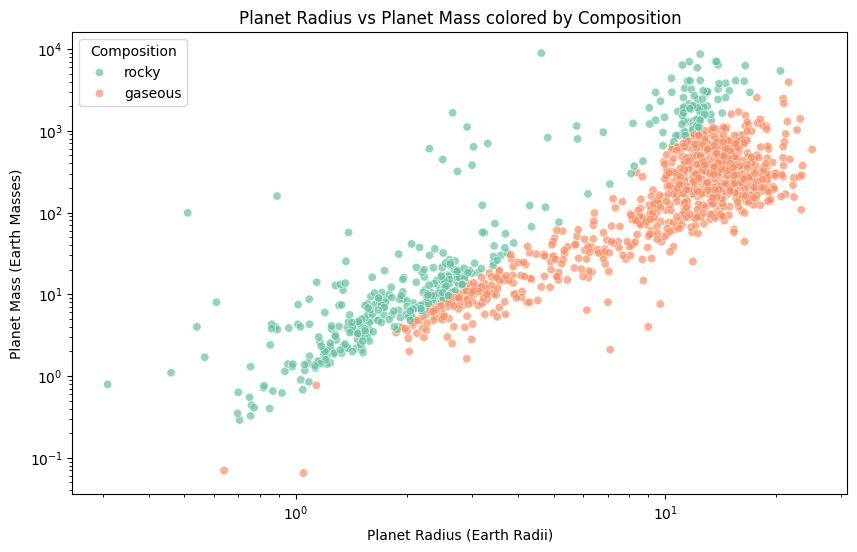

In [ ]:
# Rayon vs Masse
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    hue='composition',
    palette='Set2',
    alpha=0.7
)
plt.title('Planet Radius vs Planet Mass colored by Composition')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Planet Mass (Earth Masses)')
plt.xscale('log')  # rayon très variable => log souvent utile
plt.yscale('log')  # masse très variable => log utile
plt.legend(title='Composition')
plt.show()


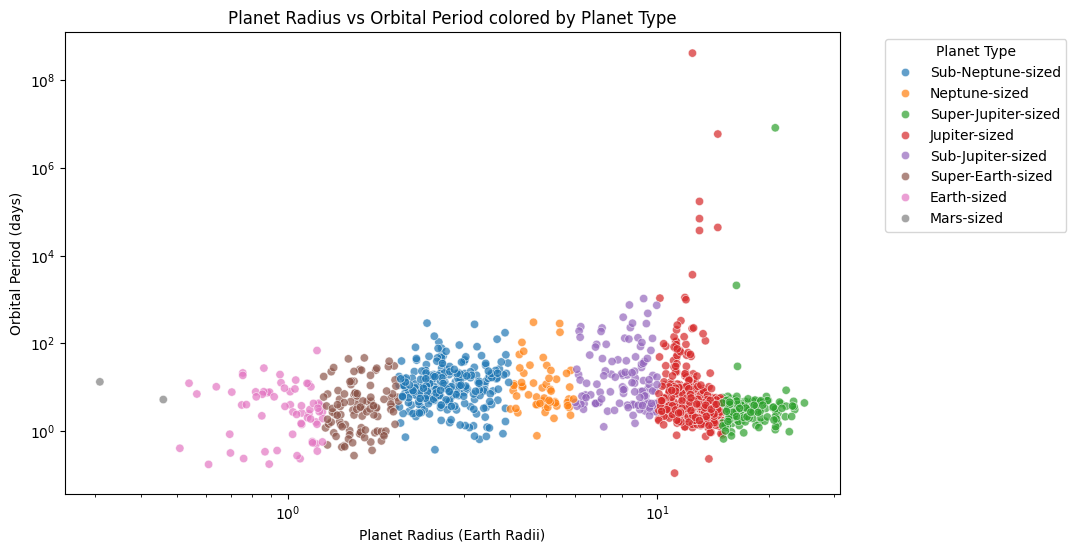

In [ ]:
# Rayon vs Période orbitale
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Radius [Earth Radius]',
    y='Orbital Period [days]',
    hue='planet_type',
    palette='tab10',
    alpha=0.7
)
plt.title('Planet Radius vs Orbital Period colored by Planet Type')
plt.xlabel('Planet Radius (Earth Radii)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Planet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


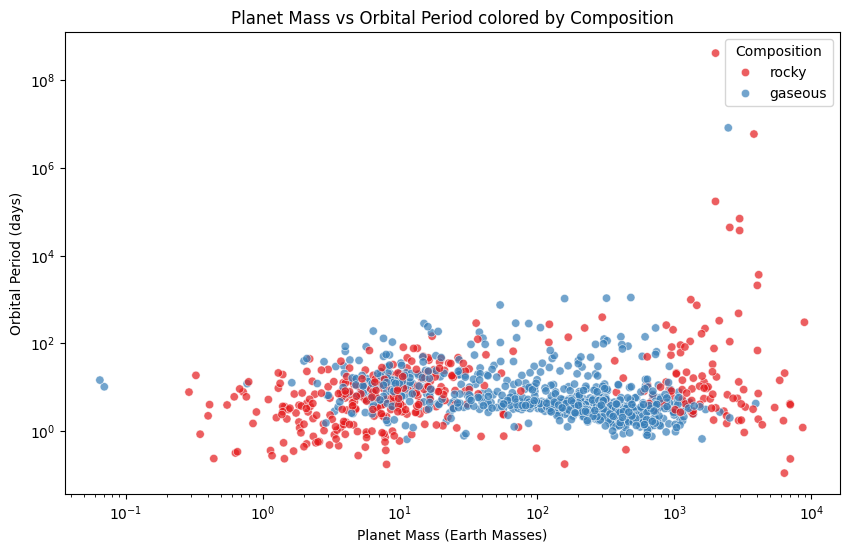

In [ ]:
# Masse vs Période orbitale
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean,
    x='Planet Mass or Mass*sin(i) [Earth Mass]',
    y='Orbital Period [days]',
    hue='composition',
    palette='Set1',
    alpha=0.7
)
plt.title('Planet Mass vs Orbital Period colored by Composition')
plt.xlabel('Planet Mass (Earth Masses)')
plt.ylabel('Orbital Period (days)')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Composition')
plt.show()


#Pourquoi utiliser une échelle logarithmique ?
Le rayon, la masse, et la période orbitale peuvent varier sur plusieurs ordres de grandeur.

L’échelle logarithmique permet de visualiser correctement la répartition et les regroupements de planètes, sans que les petites valeurs soient écrasées.

In [ ]:
!pip install plotly


**Plotly** est une bibliothèque Python pour créer des graphes interactifs et très visuels, comme :

Graphiques en ligne, barres, scatter plots, etc.

Graphiques 3D,

Cartes géographiques,

Dashboards interactifs.



In [ ]:
import plotly.express as px

# Nettoyer les données
df_clean = df.dropna(subset=[
    'Planet Radius [Earth Radius]',
    'Planet Mass or Mass*sin(i) [Earth Mass]',
    'Orbital Period [days]',
    'composition',       # Assure-toi que la colonne existe
    'planet_type'        # Assure-toi que la colonne existe
])

fig = px.scatter_3d(
    df_clean,
    x='Planet Radius [Earth Radius]',
    y='Planet Mass or Mass*sin(i) [Earth Mass]',
    z='Orbital Period [days]',
    color='composition',   # tu peux mettre aussi 'planet_type'
    symbol='planet_type',  # optionnel, pour varier le marker selon le type
    size='Planet Radius [Earth Radius]',  # optionnel, taille selon le rayon
    hover_name='Planet Name',  # nom de la planète au survol
    log_x=True,
    log_y=True,
    log_z=True,
    title='Exoplanets 3D: Radius vs Mass vs Orbital Period (log scale)'
)

fig.update_layout(
    scene=dict(
        xaxis_title='Planet Radius (Earth Radii)',
        yaxis_title='Planet Mass (Earth Masses)',
        zaxis_title='Orbital Period (days)'
    ),
    legend_title_text='Composition'
)

fig.show()


# Explication
log_x=True, log_y=True, log_z=True : échelle logarithmique sur les 3 axes.

color : variable catégorielle pour la couleur.

symbol : change la forme des points selon un autre facteur catégoriel (optionnel).

size : la taille du point selon le rayon pour plus de lisibilité.

hover_name : affiche le nom de la planète au survol.



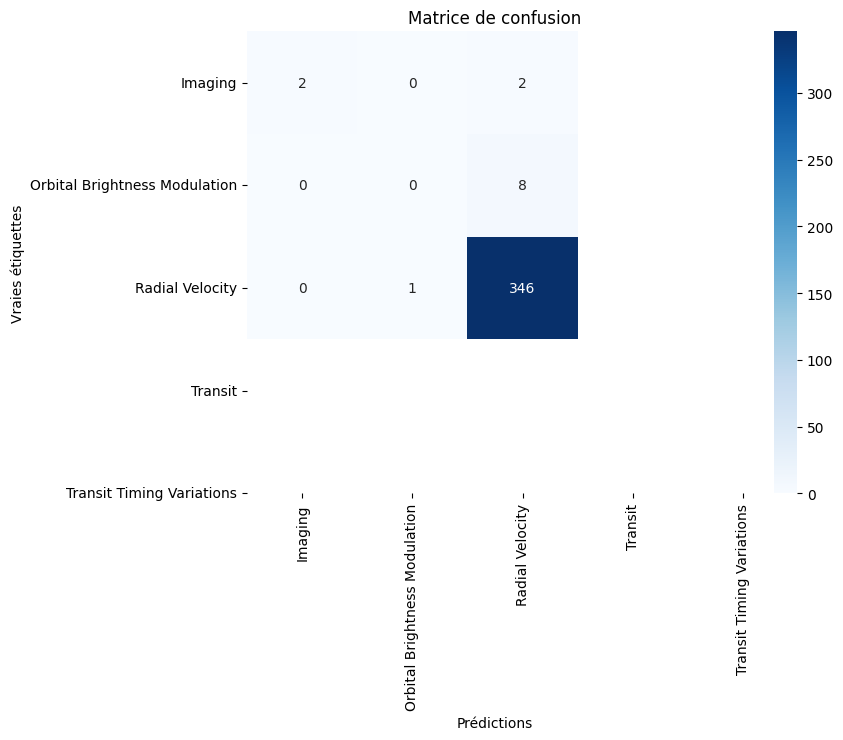

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()


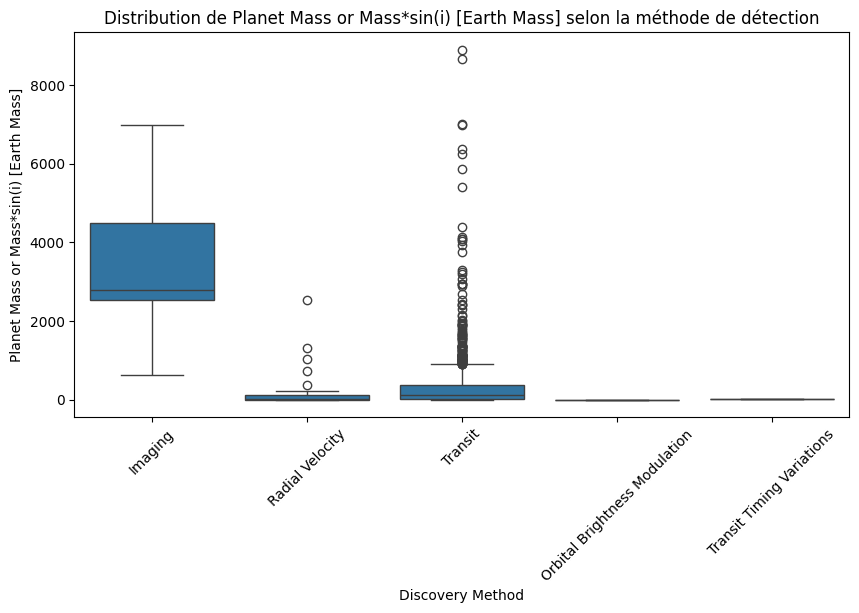

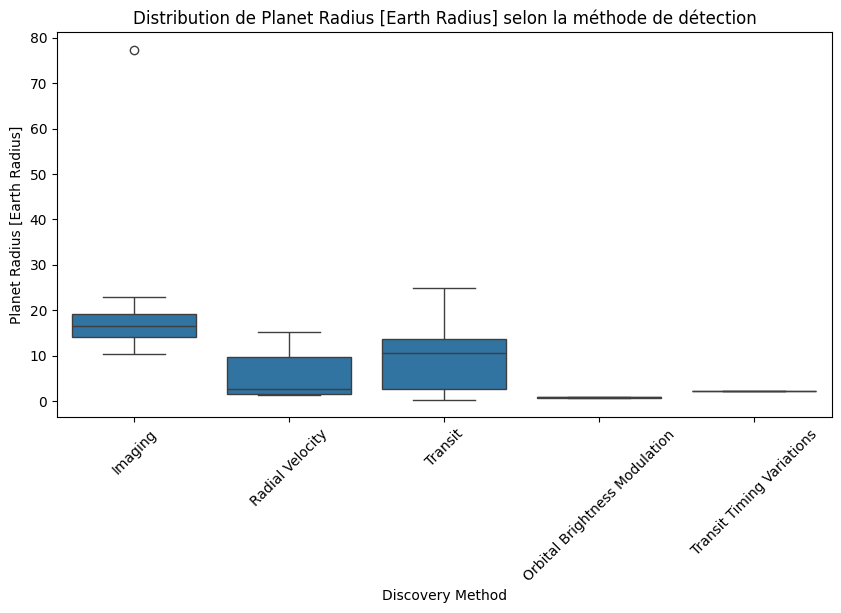

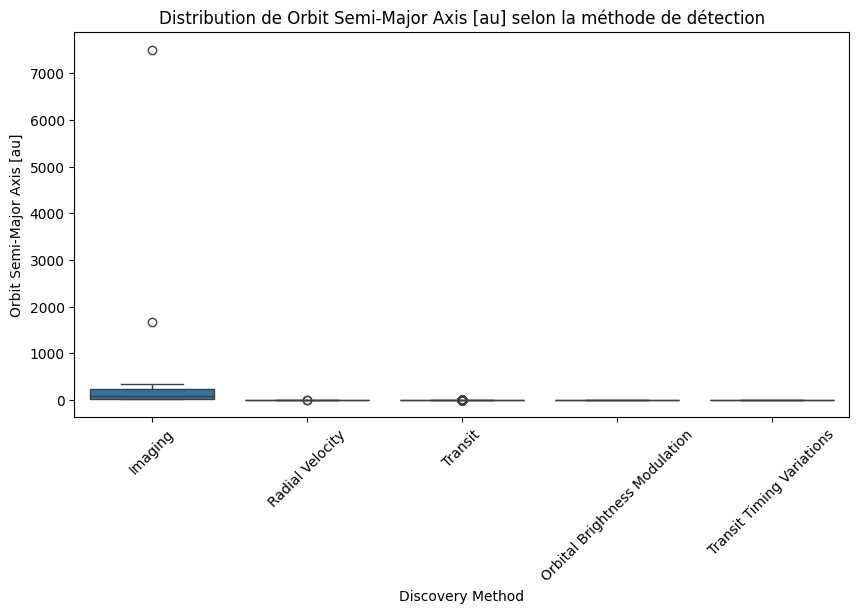

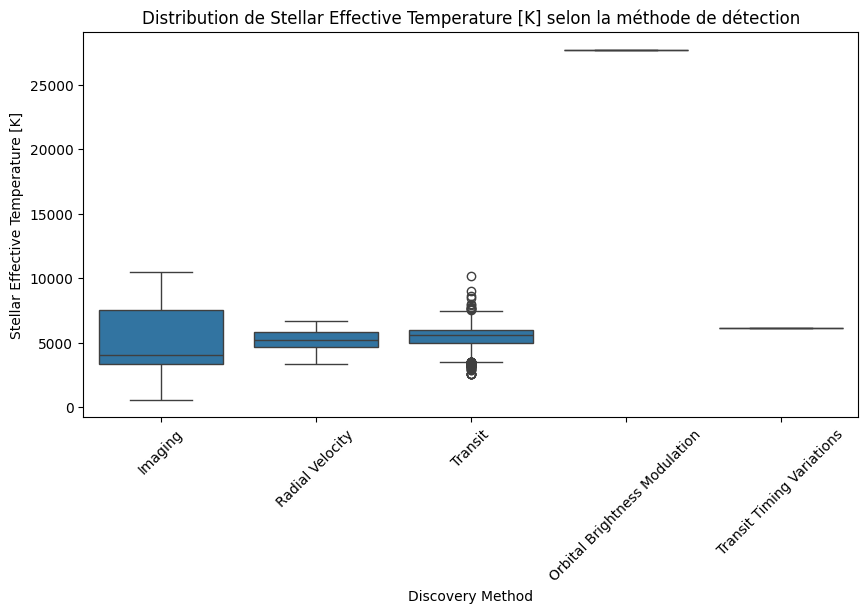

In [ ]:
for feature in features:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=y, y=df[feature])
    plt.title(f'Distribution de {feature} selon la méthode de détection')
    plt.xticks(rotation=45)
    plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class i

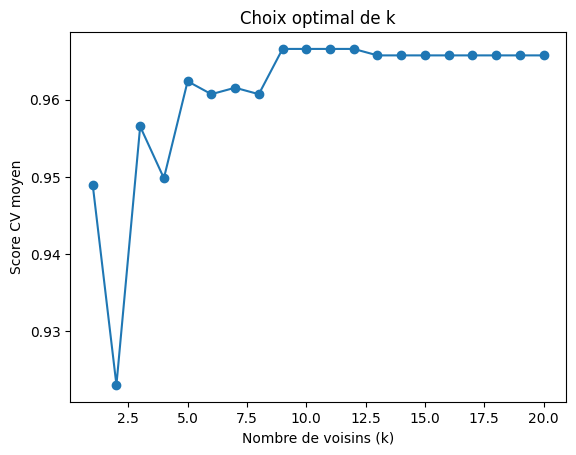

In [ ]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, scaler.fit_transform(X), y_encoded, cv=5).mean()
    scores.append(score)

plt.plot(k_range, scores, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Score CV moyen')
plt.title('Choix optimal de k')
plt.show()


Analyse des planètes potentiellement habitables
Définir une zone habitable simple : température entre 200 K et 350 K, rayon entre 0.5 et 2 R_terre, flux d’énergie reçu entre 0.8 et 1.2 fois celui de la Terre, etc.
Créer une colonne binaire habitable (oui / non), puis entraîner un modèle de prédiction.


In [ ]:
renommage = {
    'Planet Name': 'pl_name',
    'Host Name': 'hostname',
    'Discovery Year': 'disc_year',
    'Discovery Method': 'discoverymethod',
    'Orbital Period [days]': 'pl_orbper',
    'Orbit Semi-Major Axis [au]': 'pl_orbsmax',
    'Planet Radius [Earth Radius]': 'pl_rade',
    'Planet Radius [Jupiter Radius]': 'pl_radj',
    'Planet Mass or Mass*sin(i) [Earth Mass]': 'pl_bmasse',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]': 'pl_bmassj',
    'Eccentricity': 'pl_orbeccen',
    'Insolation Flux [Earth Flux]': 'pl_insol',
    'Equilibrium Temperature [K]': 'pl_eqt',
    'Stellar Effective Temperature [K]': 'st_teff',
    'Stellar Surface Gravity [log10(cm/s**2)]': 'st_logg'
}

df = df.rename(columns=renommage)

# On travaille avec les noms de colonnes complets
df['habitable'] = (
    (df['pl_rade'] >= 0.5) & (df['pl_rade'] <= 2) &
    (df['st_teff'] >= 4000) & (df['st_teff'] <= 6500) &  # température étoile approximée "habitable"
    (df['pl_orbsmax'] >= 0.5) & (df['pl_orbsmax'] <= 2)  # zone habitable approximative en AU
).astype(int)


print(df['habitable'].value_counts())



habitable
0    1197
Name: count, dtype: int64


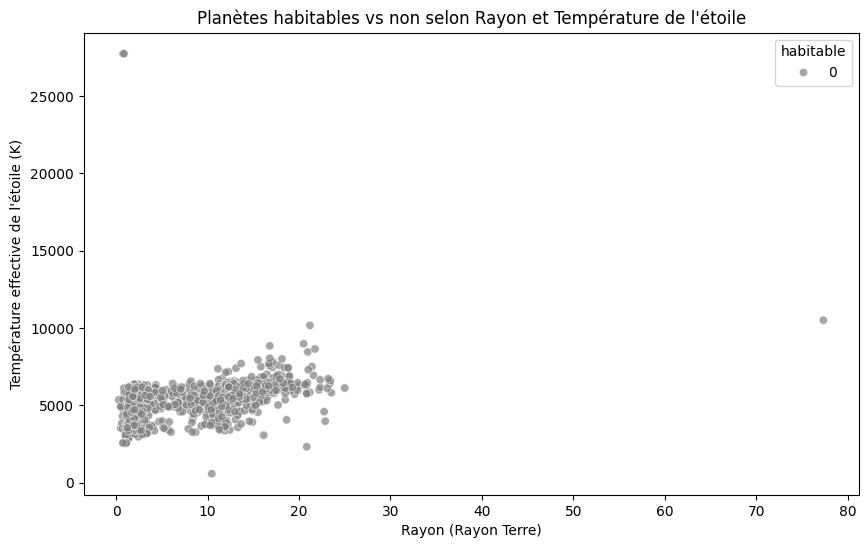

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='pl_rade',
    y='st_teff',
    hue='habitable',
    palette={0:'gray', 1:'green'},
    alpha=0.7
)
plt.title('Planètes habitables vs non selon Rayon et Température de l\'étoile')
plt.xlabel('Rayon (Rayon Terre)')
plt.ylabel('Température effective de l\'étoile (K)')
plt.show()




Utilisation du modèle KMeans

Colonnes disponibles dans df :
Index(['pl_name', 'pl_bmasse', 'pl_rade', 'pl_orbsmax', 'st_teff',
       'discoverymethod', 'habitable'],
      dtype='object')
Nombre de lignes uniques après nettoyage : 1197


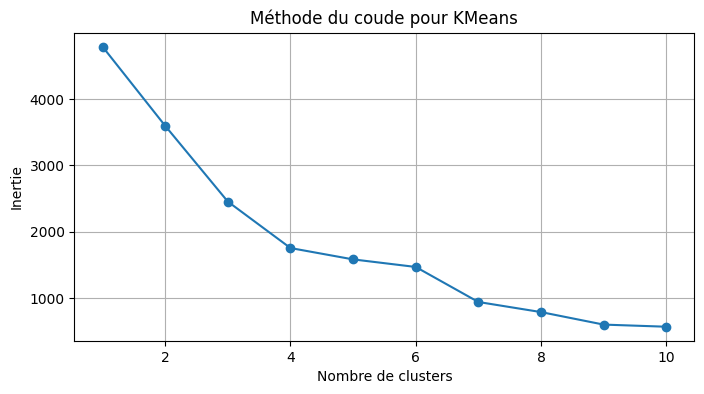

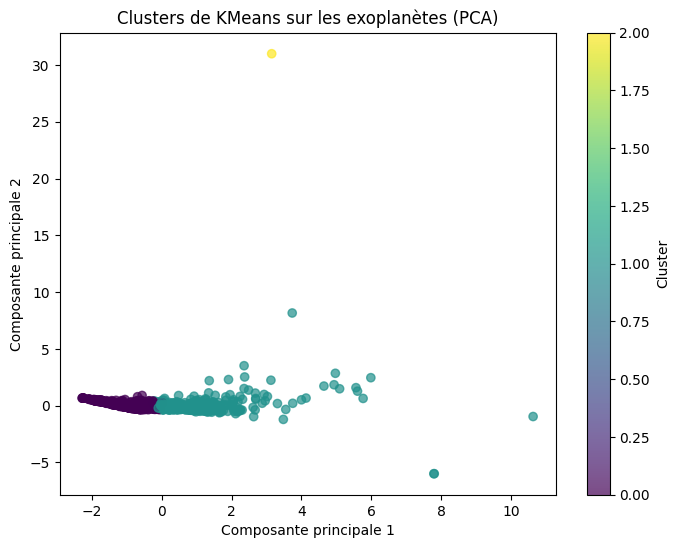

Silhouette score : 0.44

Caractéristiques moyennes par cluster :
           pl_bmasse    pl_rade   pl_orbsmax      st_teff
cluster                                                  
0          49.227836   3.703305     0.109434  4892.193345
1         695.415287  14.054720     4.230031  5951.844288
2        2002.318964  12.441969  7506.000000  3406.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- Étape 1 : Vérifier les colonnes présentes ---
print("Colonnes disponibles dans df :")
print(df.columns)

# Dictionnaire de renommage (adapter si besoin selon print ci-dessus)
renommage = {
    'Planet Name': 'pl_name',
    'Host Name': 'hostname',
    'Discovery Year': 'disc_year',
    'Discovery Method': 'discoverymethod',
    'Orbital Period [days]': 'pl_orbper',
    'Orbit Semi-Major Axis [au]': 'pl_orbsmax',
    'Planet Radius [Earth Radius]': 'pl_rade',
    'Planet Radius [Jupiter Radius]': 'pl_radj',
    'Planet Mass or Mass*sin(i) [Earth Mass]': 'pl_bmasse',
    'Planet Mass or Mass*sin(i) [Jupiter Mass]': 'pl_bmassj',
    'Eccentricity': 'pl_orbeccen',
    'Insolation Flux [Earth Flux]': 'pl_insol',
    'Equilibrium Temperature [K]': 'pl_eqt',
    'Stellar Effective Temperature [K]': 'st_teff',
    'Stellar Surface Gravity [log10(cm/s**2)]': 'st_logg'
}

df = df.rename(columns=renommage)

# Vérification des colonnes renommées présentes
# Colonnes à utiliser pour le clustering
colonnes_utiles = ['pl_bmasse', 'pl_rade', 'pl_orbsmax', 'st_teff']
colonnes_presentes = [col for col in colonnes_utiles if col in df.columns]

if len(colonnes_presentes) < 2:
    raise ValueError("Trop peu de colonnes valides pour appliquer KMeans. Vérifiez les noms.")

df = df[colonnes_presentes]

# --- Nettoyage ---
df = df.dropna()
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print(f"Nombre de lignes uniques après nettoyage : {df.shape[0]}")

# --- Standardisation ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# --- Méthode du coude ---
inertias = []
range_n = range(1, 11)
for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range_n, inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title("Méthode du coude pour KMeans")
plt.grid(True)
plt.show()

# --- Clustering ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- PCA pour visualiser ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Clusters de KMeans sur les exoplanètes (PCA)')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

# --- Évaluation ---
score = silhouette_score(X_scaled, labels)
print(f"Silhouette score : {score:.2f}")

# --- Moyennes par cluster ---
df['cluster'] = labels
print("\nCaractéristiques moyennes par cluster :")
print(df.groupby('cluster').mean())
